# Machine Learning in Python: Regression

# Exploratory Data Analysis (EDA) for Regression

> #### ☑︎ Objectives
> - Introduce some of the key packages for EDA and ML
> - Introduce and explore the Ames Housing dataset

Here, we'll work through some exploration of the Ames housing data. Most of the code is provided for you,
but you'll have to fill in some parts: these parts will be indicated with either `...` or `____`.

First, let’s load the required libraries. We will use the `sklearn` library for our ML tasks, and the `pandas`, `numpy`, `matplotlib`, `seaborn` and `upsetplot` libraries for general data processing and visualisation.

In [1]:
# Disable some warnings produced by pandas etc.
# (Don't do this in your actual analyses as you may miss important warnings)
import warnings
warnings.simplefilter('ignore', category=UserWarning)
warnings.simplefilter('ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
import upsetplot
%matplotlib inline
sns.set(font_scale = 1.5)

## Load the data

We will use the Ames housing data to explore different ML approaches to regression. This dataset was “designed” by Dean De Cock as an alternative to the “classic” Boston housing dataset, and has been extensively used in ML teaching. It is also available from kaggle as part of its [advanced regression practice competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

The Ames Housing [Data Documentation file](https://github.sydney.edu.au/informatics/lessons-mlr/blob/gh-pages/_episodes_rmd/data/AmesHousing_DataDocumentation.txt) describes the independent variables presented in the data. This includes:

- 20 continuous variables relate to various area dimensions for each observation
- 14 discrete variables, which typically quantify the number of items occurring within the house
- 23 ordinal, 23 nominal categorical variables, with 2 (STREET: gravel or paved) - 28 (NEIGHBORHOOD) classes

We will explore both the “uncleaned” data available from kaggle/UCI, and the processed data available in the AmesHousing package in R, for which documentation is available [here](https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf). It can be useful for understanding what each of the independent variables mean.

In [2]:
ames_clean = pd.read_csv('data/AmesHousingClean.csv')
ames_raw = pd.read_csv('data/AmesHousingDirty.csv')

## Exploratory data analysis

Exploratory data analysis involves looking at:

- the distribution of variables in your dataset
- whether any data is missing
- skewed
- correlated variables


> ### ⚠️ Exercise
>
> Below, we'll explore the Ames housing dataset. As you go through the code,
> think about:
>
> - What each variable represents and how it's been coded
> - Which variables do you think will be important for predicting sale price?
> - How do the "clean" and "dirty" datasets differ?
>   - What was missing in the raw data?
>   - What are some of the approaches that have been taken to deal with missingness?

Look at the first 5 rows of data with the `DataFrame.head()` method:

In [3]:
# Fill in the blanks below:
ames_clean.head()

MS_SubClass                 MS_Zoning  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
4             Two_Story_1946_and_Newer   Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
0           141     31770   Pave  No_Alley_Access  Slightly_Irregular   
1            80     11622   Pave  No_Alley_Access             Regular   
2            81     14267   Pave  No_Alley_Access  Slightly_Irregular   
3            93     11160   Pave  No_Alley_Access             Regular   
4            74     13830   Pave  No_Alley_Access  Slightly_Irregular   

  Land_Contour Utilities Lot_Config  ...            Fence Misc_Feature  \
0          Lvl    AllPub     Corner  ...         No_Fence          NaN   
1          Lvl    AllPub     Inside  ...  Minimum_Privacy          NaN   
2          Lvl    AllPub     Corner  ...         No_Fence         Gar2   
3          Lvl    AllPub     Corner  ...         No_Fence          NaN   
4          Lvl    AllPub     Inside  ...  Minimum_Privacy          NaN   

  Misc_Val Mo_Sold Year_Sold Sale_Type Sale_Condition Sale_Price  Longitude  \
0        0       5      2010       WD          Normal     215000 -93.619754   
1        0       6      2010       WD          Normal     105000 -93.619756   
2    12500       6      2010       WD          Normal     172000 -93.619387   
3        0       4      2010       WD          Normal     244000 -93.617320   
4        0       3      2010       WD          Normal     189900 -93.638933   

    Latitude  
0  42.054035  
1  42.053014  
2  42.052659  
3  42.051245  
4  42.060899  

[5 rows x 81 columns]

Use `DataFrame.info()` to get information about the column types and values:

In [4]:
ames_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

Compare with the raw dataset:

In [5]:
ames_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Explore how many null/missing values are in the clean dataset by using `isna()`:

In [6]:
ames_clean.isna().agg("sum")

MS_SubClass       0
MS_Zoning         0
Lot_Frontage      0
Lot_Area          0
Street            0
                 ..
Sale_Type         0
Sale_Condition    0
Sale_Price        0
Longitude         0
Latitude          0
Length: 81, dtype: int64

What about in the original?

In [7]:
ames_raw.isna().agg("sum")

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

Find out which variables have the most missing data (we have to do a bit of extra work here to get this in a nice format):

In [8]:
missing_counts = (
    ames_raw.isnull()
    .agg('sum')
    .pipe(lambda x: x[x > 0])  # Only show variables with > 0 missing values
    .sort_values(ascending=False)
    .reset_index()  # Convert to a dataframe
)
missing_counts.columns = ["variable", "n_missing"]
missing_counts

variable  n_missing
0          Pool QC       2917
1     Misc Feature       2824
2            Alley       2732
3            Fence       2358
4     Mas Vnr Type       1775
5     Fireplace Qu       1422
6     Lot Frontage        490
7      Garage Cond        159
8      Garage Qual        159
9    Garage Finish        159
10   Garage Yr Blt        159
11     Garage Type        157
12   Bsmt Exposure         83
13  BsmtFin Type 2         81
14       Bsmt Cond         80
15       Bsmt Qual         80
16  BsmtFin Type 1         80
17    Mas Vnr Area         23
18  Bsmt Half Bath          2
19  Bsmt Full Bath          2
20    BsmtFin SF 1          1
21     Garage Cars          1
22     Garage Area          1
23   Total Bsmt SF          1
24     Bsmt Unf SF          1
25    BsmtFin SF 2          1
26      Electrical          1

Let's plot the number of missing values with `seaborn`'s `barplot()` function. (Note: it's better to put `variable` on the y-axis so you can read the labels)

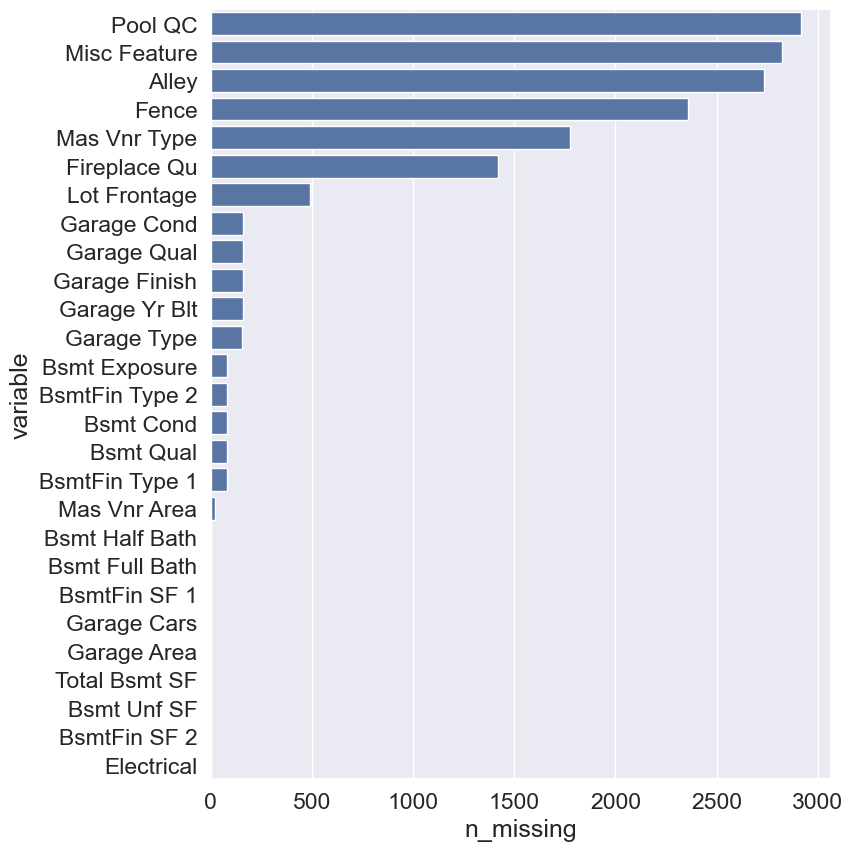

In [9]:
f, ax = plt.subplots(figsize = (8, 10))
sns.barplot(missing_counts, y="variable", x="n_missing", ax = ax);

An "upset plot" is a novel kind of plot for understanding what combinations occur in a dataset. Here, we'll use it for seeing which combinations of missing values are the most common. Why might these combinations occur?

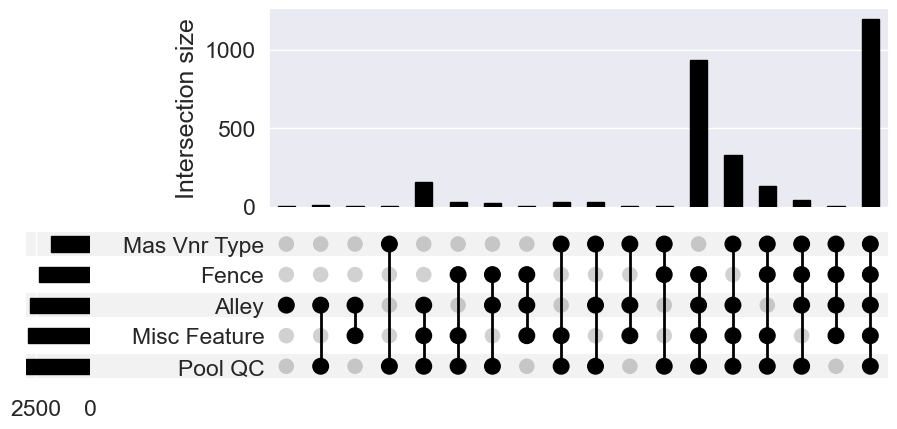

In [10]:
# Use upsetplot to see where missing values occur
# together
# Only use the top 5 columns
missing_cols = missing_counts["variable"].iloc[:5].tolist()
missing_combinations = (
    ames_raw.loc[:, missing_cols]
    .isnull()
    .groupby(missing_cols)
    .size()
)
upsetplot.plot(missing_combinations);

> ### ⚠️ Challenge: Missingness
> Compare the entries in the "clean" and "dirty" data frames (try `df['Column'].value_counts()`). How was the data cleaned up?

In [11]:
# Try writing your own code here to compare them

***

## Explore the data to see whether there are any unusual relationships between variables 

#### Pull out numeric and categoric variables:

1. What data types do I have in my data? Can I infer that some of them are categorical, and others are not?

In [12]:
ames_clean.dtypes.value_counts()

object     46
int64      33
float64     2
Name: count, dtype: int64

2. Pull out the categorical and numerical variables. Check the documentation for [select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) to see how you can select both `float` and `int` columns.

In [13]:
cat_vars = ames_clean.select_dtypes(include = ['object']).columns.tolist()
numeric_vars = ames_clean.select_dtypes(include = ["number"]).columns.tolist()

3. Plot the numeric variables with `sns.pairplot`, and their relationship with sale price

> ## ⚠️ Challenge
> Look at the documentation for [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) and try out some of the different visualisation options.
> Do you prefer any of them for understanding this dataset?

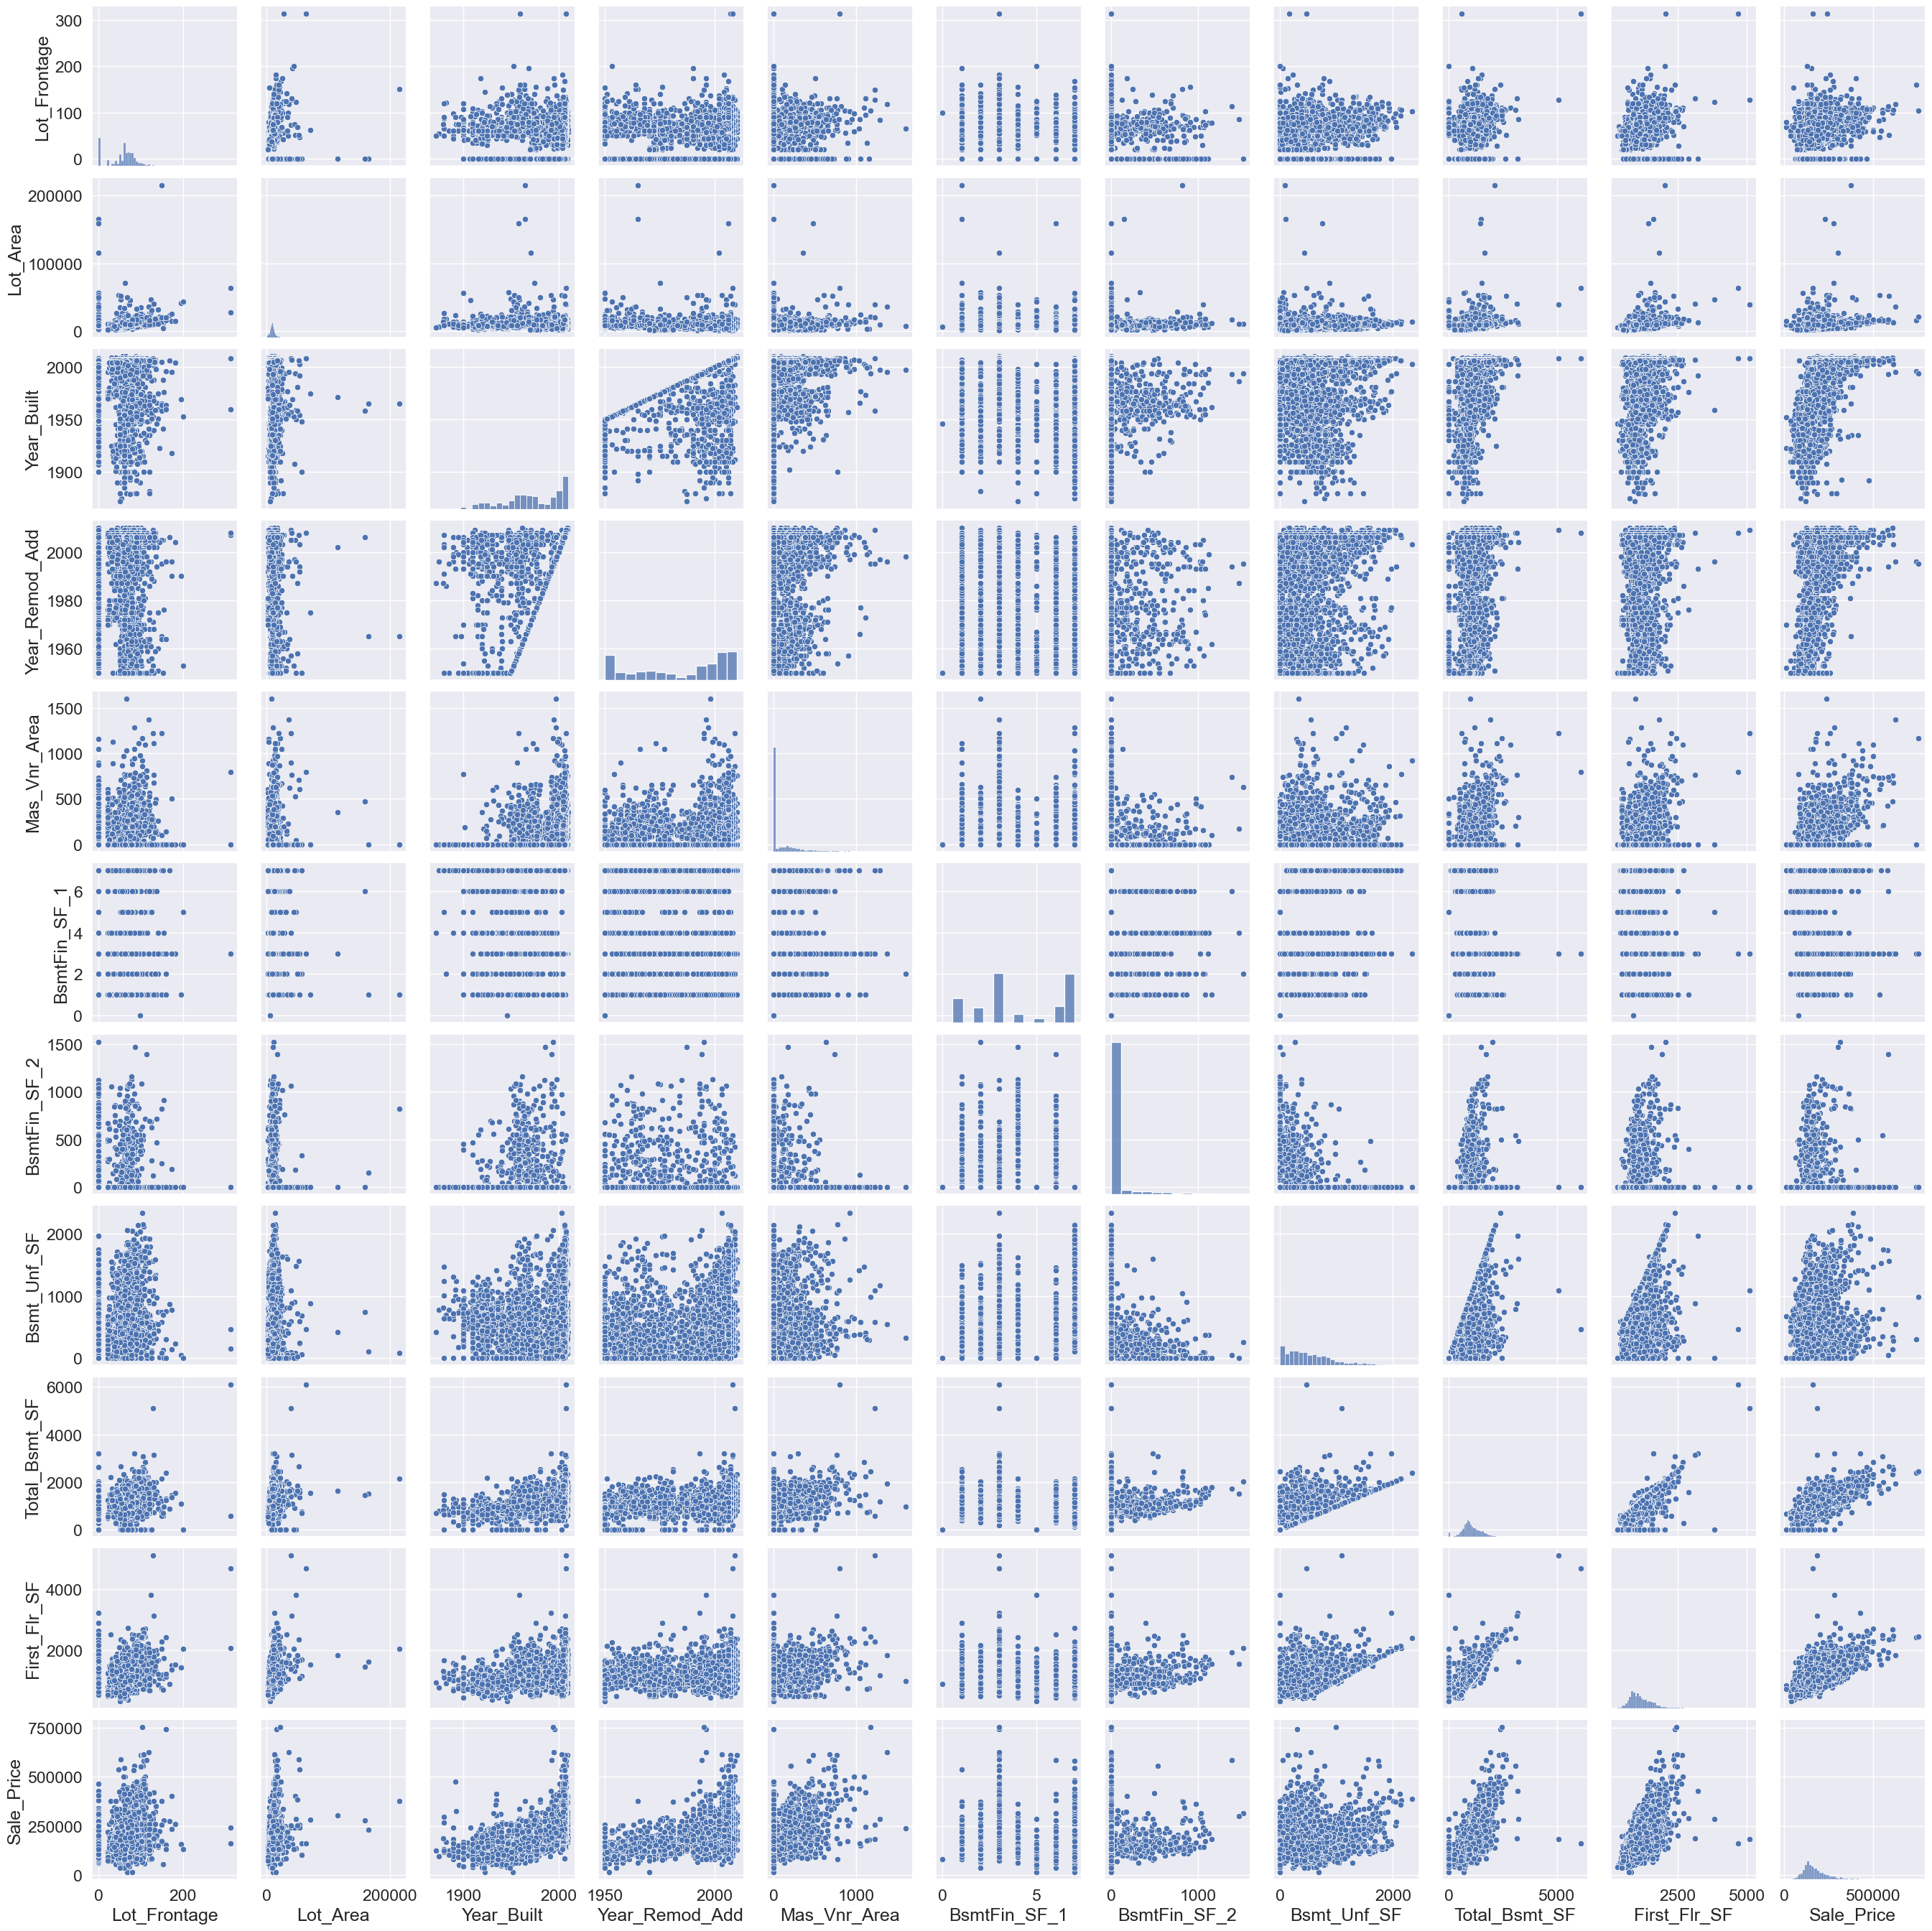

In [14]:
# Only plot ~10 variables at a time - otherwise too hard to
#   see what's happening
sns.pairplot(
    ames_clean,
    vars = numeric_vars[:10] + ["Sale_Price"]
);

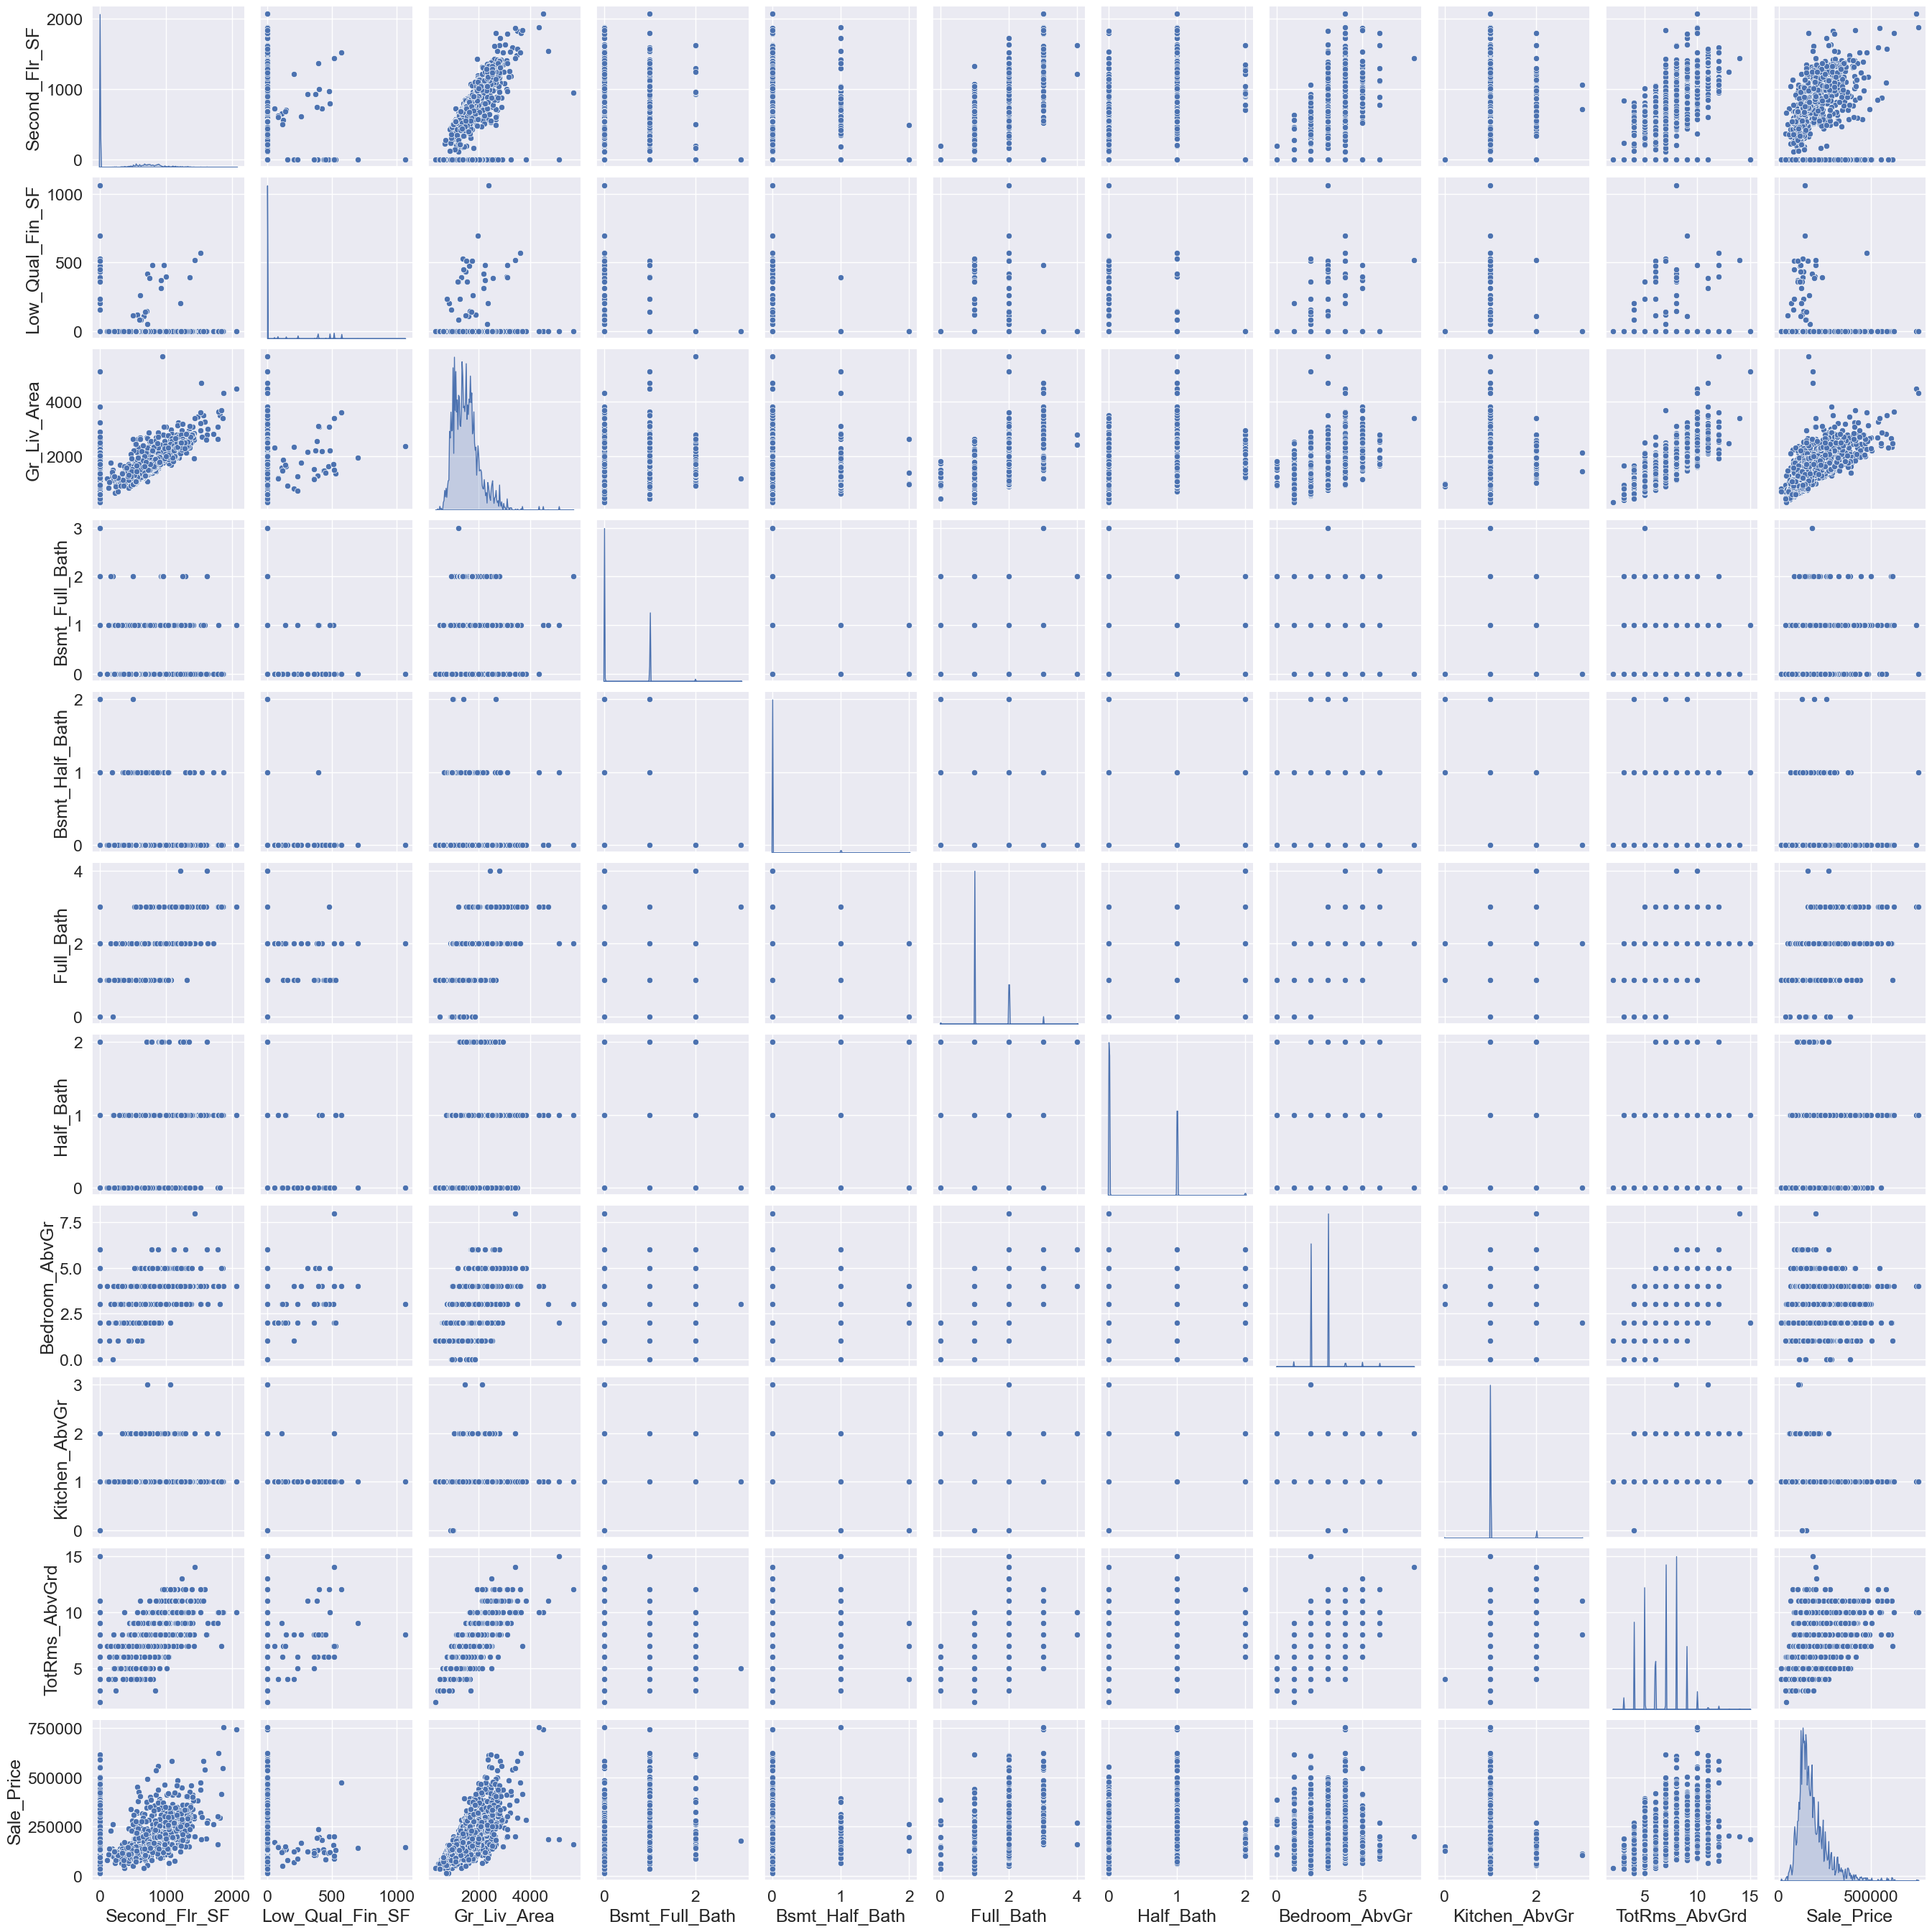

In [15]:
# Plot remaining variables
sns.pairplot(
    ames_clean,
    diag_kind="kde",
    vars = numeric_vars[10:20] + ["Sale_Price"],
    diag_kws={'bw': 0.01}
);

#### Correlations

`pandas` has a builtin method for calculating the [correlations](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) between all variables in a DataFrame.

Of the numeric variables, which ones are the most correlated:
* With sale price?
* With each other? (This is an important thing to check for some models)

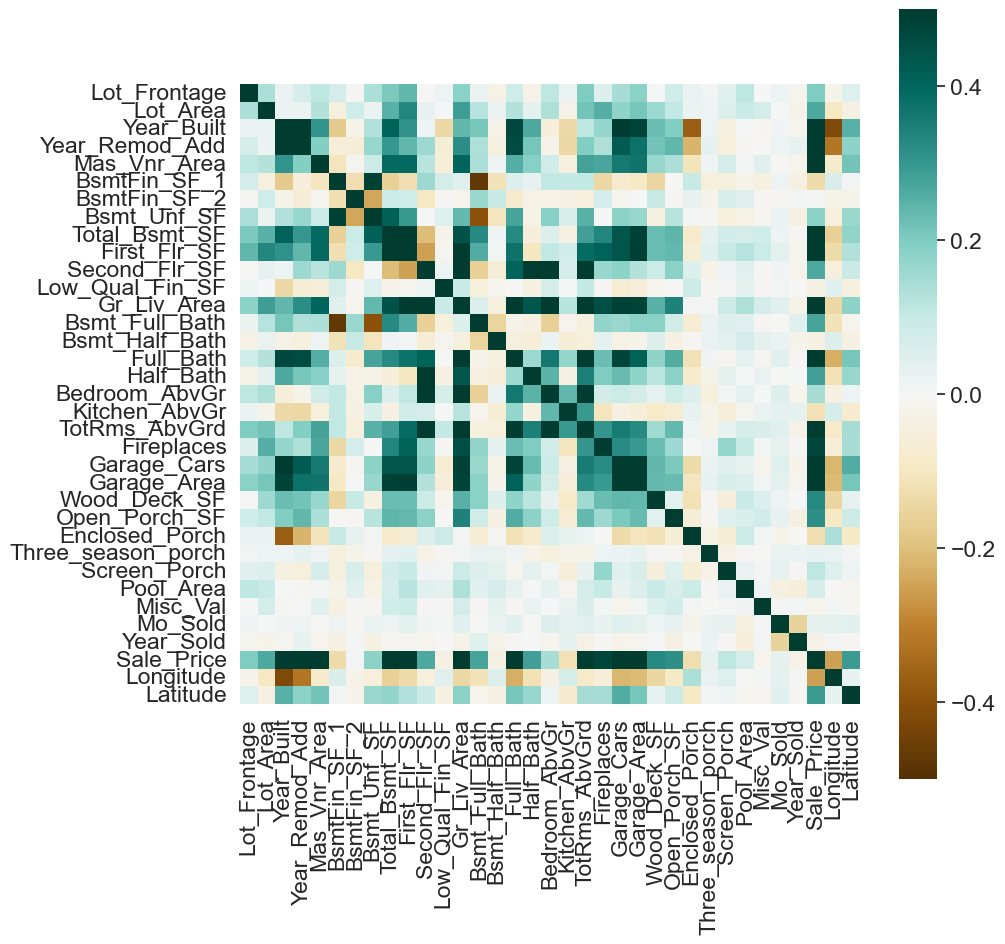

In [16]:
correlations = ames_clean[numeric_vars].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlations,
            cmap=plt.cm.BrBG, 
            vmin=-0.5, vmax=0.5, 
            square=True,
            xticklabels=True, yticklabels=True,
            ax=ax);

We can also use clustering to group highly correlated variables together.

* What groups of variables emerge?
* Does it make sense that these variables would be correlated?

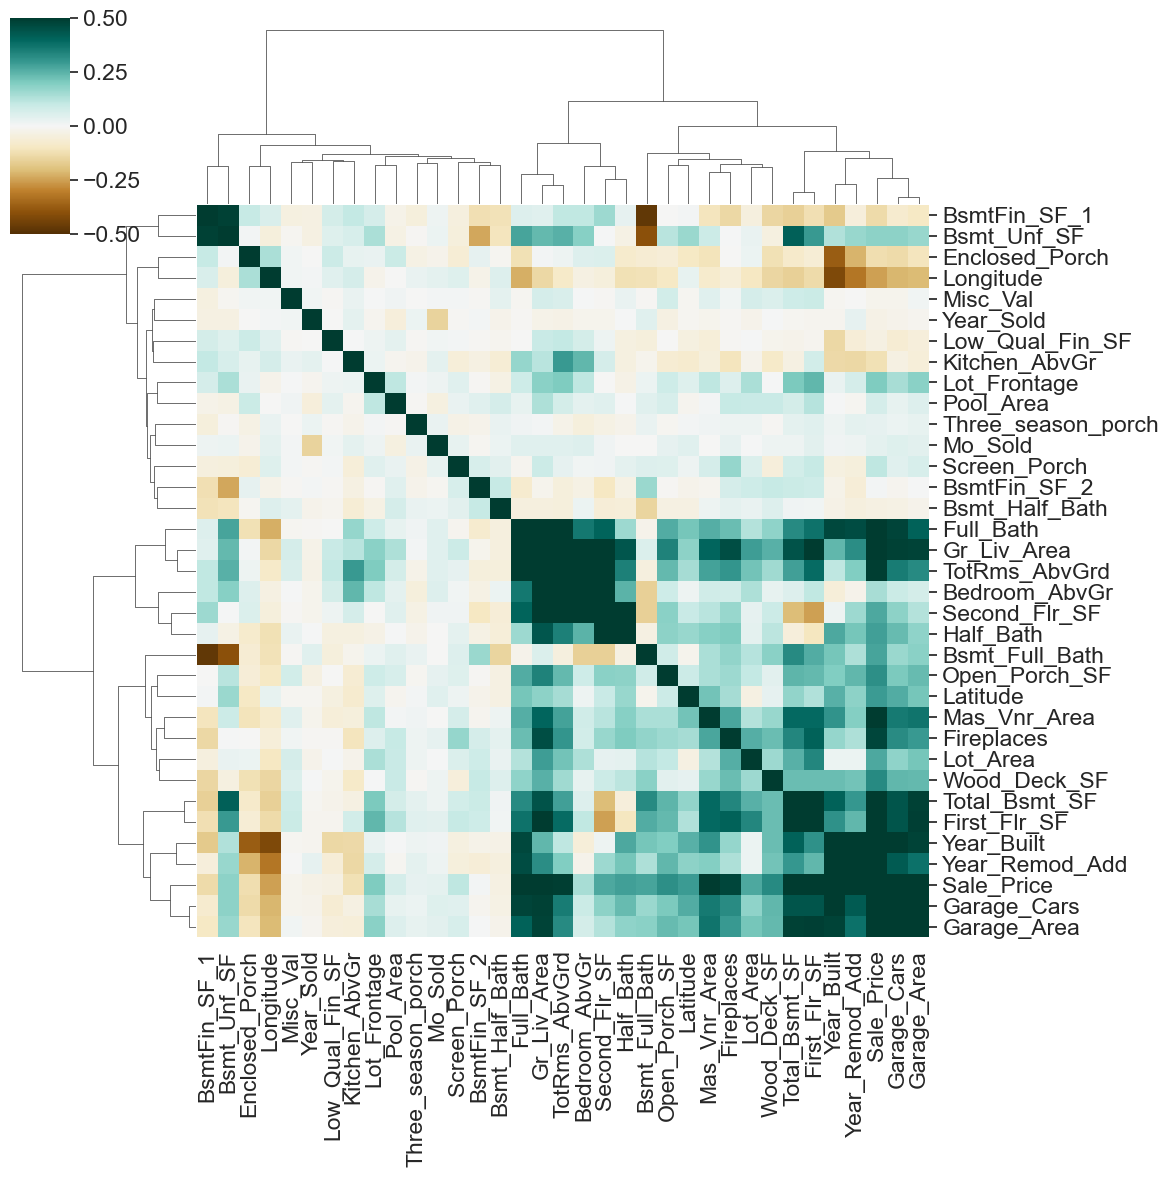

In [17]:
sns.clustermap(
    correlations, 
    method="ward", 
    cmap=plt.cm.BrBG, 
    vmin=-0.5, vmax=0.5,
    xticklabels=1, yticklabels=1,
    figsize=(12, 12)
);

If you want to examine the relationship between a variable and sale price in more detail, you can use plots like `sns.lmplot`.

Let's look at `Gr_Liv_Area`, since it had an odd distribution in the scatterplots above:

* What do you notice about the distribution?
* Is there a group of values that stand out?

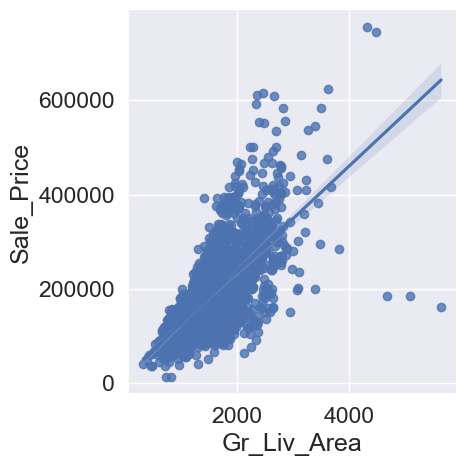

In [18]:
sns.lmplot(
    data = ames_clean,
    x = 'Gr_Liv_Area', y = 'Sale_Price'
);

Can you see any outliers in the data? Arguably, the five points on the right, wtih Gr_Liv_Area > 4000, are outliers, that can significantly affect the fit of our model. We will filter these out prior to modelling:

In [19]:
ames_clean = ames_clean.loc[ames_clean['Gr_Liv_Area'] <= 4000, :]

You can also use violin plots (a variation on box plots that also shows the distribution of the values) to explore the relationship between categorical variables and the outcome:

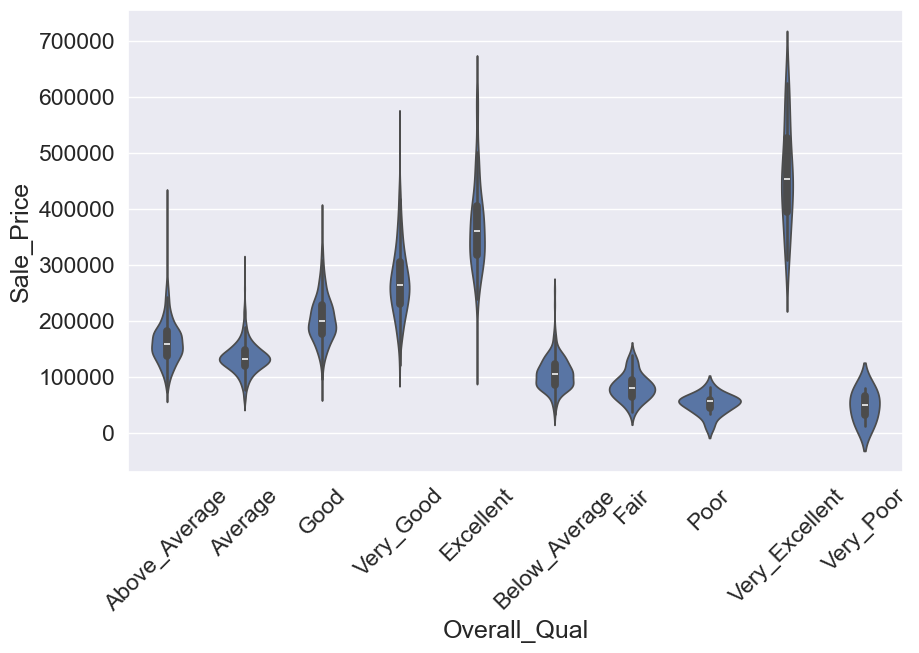

In [20]:
# Choose a categorical variable to plot against sale price
f, ax = plt.subplots(figsize = (10, 6))
ax.tick_params(axis='x', rotation=45)
sns.violinplot(
    x = "Overall_Qual",
    y = 'Sale_Price',
    data = ames_clean,
    ax = ax
);

### Explore distribution of Outcome variable

You also need to do EDA on the outcome variable to:

- identify outliers
- explore whether there is any skew in its distribution, and possibly identify a transformation to use when modelling the data

This is because many models, including ordinary linear regression, assume that prediction errors (and hence the response) are normally distributed.

Plot the distribution of the sale price variable using `sns.distplot()`:

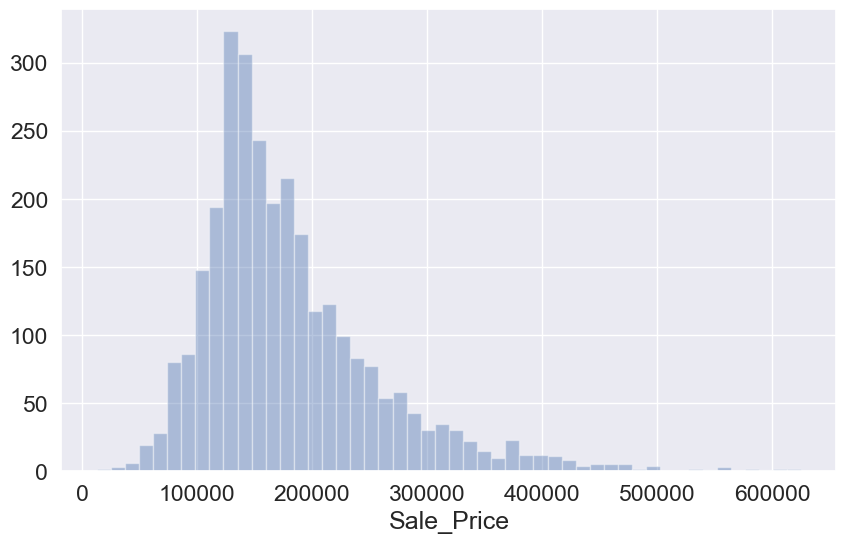

In [21]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(
    # Note: this function doesn't take a data argument,
    #   you have to provide the variable as df['column']
    ames_clean["Sale_Price"],
    kde = False,
    ax = ax
);

We'll explore different transformations of the sale price to see which transformation makes the outcome look more normally distributed. The [qqplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) function from `statsmodels` plots values against a line showing where they would be expected to fall if the data was normally distributed:

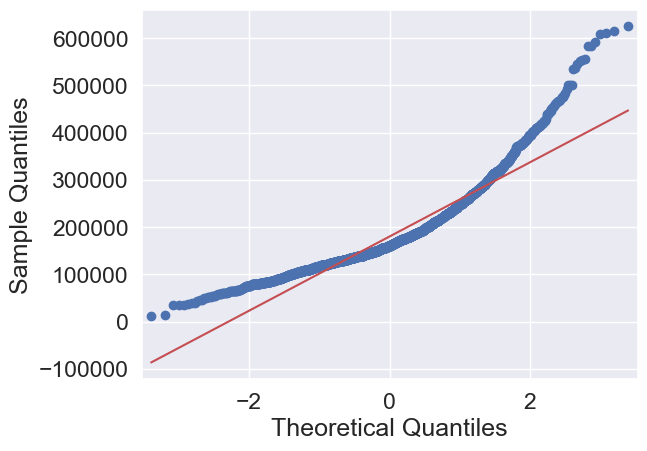

In [22]:
# Raw data
sm.qqplot(
    ames_clean['Sale_Price'],
    line = 's'
);

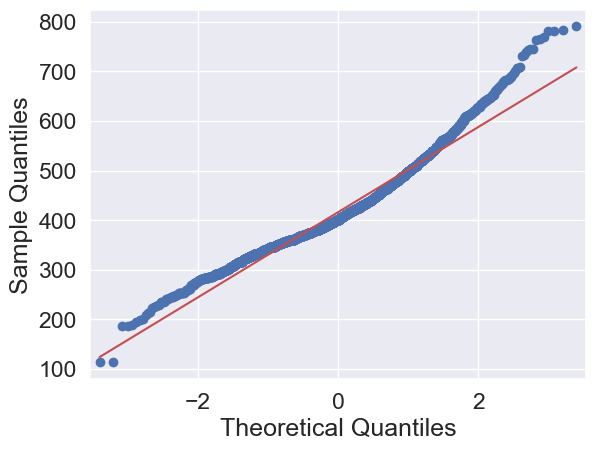

In [23]:
# sqrt transformation
sm.qqplot(
    np.sqrt(ames_clean['Sale_Price']),
    line = 's'
);

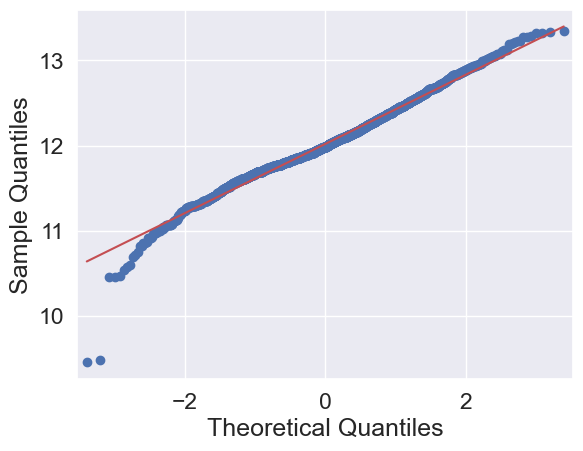

In [24]:
# log transform
sm.qqplot(
    np.log(ames_clean['Sale_Price']),
    line = 's'
);

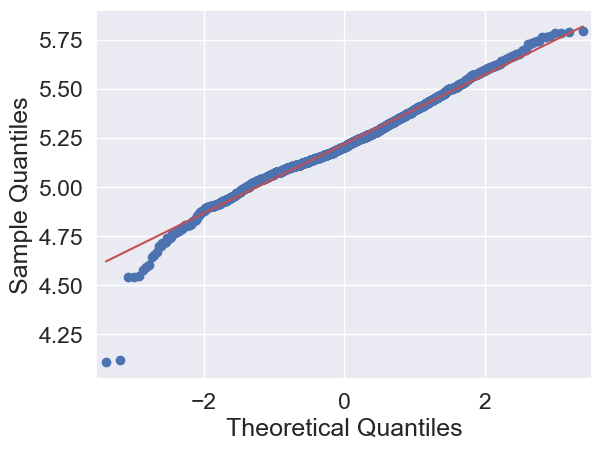

In [25]:
# log10 transform
sm.qqplot(
    np.log10(ames_clean['Sale_Price']),
    line = 's'
);

> ### ⚠️ Challenge: Outcome transformations
> If you were working with this dataset, which of the above would you prefer?

> ### 📝 Key points: Exploratory Data Analysis
> - EDA is the first step of any analysis, and often very time consuming.
> - Skipping EDA can result in substantial issues with subsequent analysis.
> 
> #### Questions:
> - How do we predict one continuous variable based on others?
> - What is the first step of any ML project (and often the most time consuming)?


# Regression models: Linear regression

> ## ❓ Questions
> - How do we preprocess our data for modelling?
> - How do we fit a basic linear model using scikit-learn?
    
> ## ☑︎ Objectives
> - To use sklearn.preprocessing or pandas to preprocess our data
> - To fit and compare some basic linear models using one, two, 
    or all of the variables in the dataset

With the initial data exploration out of the way, we're going to start fitting predictive models to predict the sale price.

First we'll import some new libraries and functions:

In [26]:
from scipy.special import exp10
from pandas.api.types import CategoricalDtype
import pickle 

from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures, FunctionTransformer, OneHotEncoder
)

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.linear_model import LinearRegression

To make it easier to pick up from this point, we'll reload the data (and drop the rows with outlying values of `Gr_Liv_Area`:

In [27]:
ames_clean = pd.read_csv('data/AmesHousingClean.csv')
ames_raw = pd.read_csv('data/AmesHousingDirty.csv')
ames_clean = ames_clean.loc[ames_clean['Gr_Liv_Area'] <= 4000, :]

### Preprocessing and feature engineering

Depending on the models we will fit, we need to do some preprocessing of our data to code the variables in the ways the models expect.
Standard preprocessing steps in machine learning include:

* Encoding categorical variables as numeric values - for nominal variables, we often use **one hot** or **dummy** coding.
* Scaling numeric variables to have the same mean and standard deviation - some models need this more than others.

We don't just want to apply a standard recipe, however, we also do some preprocessing based on our understanding of the data. In this dataset,
some important features that aren't currently encoded include:

* Some houses may not have basements or second floors - they will have values of 0 for variables like basement area, but we want to explicitly encode whether they have a basement or not
* Some categorical variables may have rare values that will not be useful for pediction
* There are features for the year a property was sold or remodelled, but not 

To start encoding these variables, let's first separate the categorical variables from the numeric ones:

In [28]:
cat_vars = ames_clean.select_dtypes(include = ['object']).columns.tolist()
numeric_vars = ames_clean.select_dtypes(include = ['number']).columns.tolist()

Then, we do some preprocessing:

- **dummy code** the categorical variables using `sklearn`'s `OneHotEncoder` - it also has the option to **group uncommon categories** into a single category.
- For features like `Second_Flr_SF`, create separate **binary** variables that explicitly encode whether the property has a second floor or not
- For features like `Year_Built`, recode them into the age/number of years since they were built

`sklearn` has a few preprocessing tools, and in theory we could do all of our preprocessing using them, but in practice it's easier to use a mix of `sklearn`'s tools and standard `pandas` operations.

In [29]:
def create_binary_feature(df, column: str):
    return np.where(df[column] == 0, 0, 1)

# Age variables
ames_clean['Age'] = ames_clean['Year_Sold'].max() - ames_clean['Year_Built']
ames_clean['Remodel_Age'] = ames_clean['Year_Sold'].max() - ames_clean['Year_Remod_Add']

# Any misc features vs. none
ames_clean['Misc_Feature_Present'] =  np.where(ames_clean['Misc_Feature'] == "None", 0, 1)

# Dummy code categorical variables, and group infrequent categories together
onehot_encoder = OneHotEncoder(min_frequency=20, sparse_output=False, drop="first")
dummy_vars = onehot_encoder.fit_transform(ames_clean[cat_vars])
# Drop original categorical vars
ames_clean = ames_clean.drop(columns=cat_vars)
# Add dummy_vars
ames_clean = pd.concat([ames_clean, dummy_vars], axis=1)


# Create binary features for second floor etc.
binary_features = [
    'Second_Flr_SF','Three_season_porch','BsmtFin_SF_2','Bsmt_Unf_SF',
    'Enclosed_Porch','Low_Qual_Fin_SF', 'Mas_Vnr_Area','Lot_Frontage',
    'Open_Porch_SF','Screen_Porch','Pool_Area','Wood_Deck_SF', 
]
for column in binary_features:
    ames_clean[column + "_binary"] = create_binary_feature(ames_clean, column)

The processing above does create some duplicate variables, e.g. there are multiple columns indicating `No_Basement` (because there were multiple categorical variables with this value).

We also want to drop the `Year_Built` and `Year_Remod_Add` variables, since we've replaced them with ages.

We'll drop these variables (except for the first occurrence of each duplicate) now:

In [30]:
basement_vars = list(ames_clean.filter(regex="No_Basement").columns[1:])
garage_vars = list(ames_clean.filter(regex="No_Garage").columns[1:])
vars_to_drop = [*basement_vars, *garage_vars, "Year_Built", "Year_Remod_Add"]
print("Dropping:", vars_to_drop)
ames_clean = ames_clean.drop(columns=vars_to_drop)

Dropping: ['Bsmt_Cond_No_Basement', 'Bsmt_Exposure_No_Basement', 'BsmtFin_Type_1_No_Basement', 'BsmtFin_Type_2_No_Basement', 'Garage_Finish_No_Garage', 'Garage_Qual_No_Garage', 'Garage_Cond_No_Garage', 'Year_Built', 'Year_Remod_Add']


## Data splitting: creating training and test sets

We can use `sklearn`'s `train_test_split` to create training and testing datasets. We want similar distributions of the outcome in the training and test data, so we can use the `stratify` option. However, this requires a categorical variable, so we'll first bin the `Sale_Price` outcome to create one:

In [31]:
# Cut into 10 bins
ames_clean['Sale_Price_quantile'] =  pd.qcut(
    ames_clean['Sale_Price'],
    q=10,
    labels=range(10)
)

Split the data, allocating 70% of the data to the training set (and 30% to the test set):

In [32]:
index_train, index_test  = train_test_split(
    ames_clean.index.values, 
    train_size=0.7,
    stratify = ames_clean['Sale_Price_quantile'].values,
    # We use random_state to get consistent results each time we run this
    random_state=42
)

# get rid of the quartile column so we're not using it to predict sale price
ames_clean = ames_clean.drop('Sale_Price_quantile', axis = 1)

# Create variables for the training and test sets 
ames_train = ames_clean.loc[index_train, :].copy()
ames_test = ames_clean.loc[index_test, :].copy()

How many rows have been allocated to the training and test sets?

In [33]:
# Check the number of rows + columns in each dataset
print(ames_train.shape)
print(ames_test.shape)

(2047, 254)
(878, 254)


To log-transform the outcome to a more normal distribution, we can use `sklearn`'s `FunctionTransformer`: while we could just transform the outcome ourself, `FunctionTransformer` allows us to transform the response back to the original scale easily.

In [34]:
# We want numpy's log10 function for the transformation
log_transformer = FunctionTransformer(
    func=np.log10,
    inverse_func=exp10,
    validate=True
)

Next we want to separate the predictors ($X$) from the outcome ($y$), for both the training and test datasets:

In [35]:
predictors = ames_clean.columns.values.tolist()
predictors.remove('Sale_Price')
# Create training and test response vectors
ames_train_y = log_transformer.fit_transform(ames_train[['Sale_Price']])
ames_test_y = log_transformer.transform(ames_test[['Sale_Price']])

# Write training and test design matrices
ames_train_x = ames_train[predictors].copy()
ames_test_x = ames_test[predictors].copy()

Check the types of the $X$ and $y$ variables: a `DataFrame` works for the predictors, but `sklearn` generally expects a single array for the outcome:

In [36]:
type(ames_train_x)

pandas.core.frame.DataFrame

In [37]:
type(ames_train_y)

numpy.ndarray

## Fitting linear regression models

Now that we've created the training and test datasets, we're ready to fit our first models.
We'll start with a simple one: a linear regression model, using all our predictors. We will fit this to the **training** data to fit the coefficients, and later we'll **predict** on the test data:

In [38]:
# Fit an Ordinary Least Squares Regression using all variables
# fit_intercept = True is the default option,
# we don't need to specify it in other regressions 
ames_ols_all = LinearRegression(fit_intercept=True)
ames_ols_all.fit(ames_train_x, ames_train_y)

LinearRegression()

In an explanatory context, we might have predicted sale price using a smaller set of variables that we expected/theorized to be important, e.g. the age of the house. We can fit a model using only a few variables to see how this strategy might work in a prediction context.

In [39]:
reduced_vars = ['Age', 'First_Flr_SF', 'Second_Flr_SF']
ames_ols_reduced = LinearRegression()
ames_ols_reduced.fit(ames_train_x[reduced_vars], ames_train_y)

LinearRegression()

One of the advantages of linear regression is that the coefficients are interpretable (although here the represent changes on the log-scale). So we can easily see whether each predictor has a positive or negative relationship with the outcome.

We can inspect the intercept and coefficients from the models:

> ### ⚠️ Challenge
> In the reduced model, do age, first floor area and second floor area have positive or negative relationships with the outcome?

In [40]:
ames_ols_reduced.intercept_, ames_ols_reduced.coef_

(array([4.9233337]), array([[-0.0024528 ,  0.000287  ,  0.00018128]]))

### Assessing model fit:

`sklearn` provides a number of useful tools for predicting from our models, and then applying different accuracy metrics to those predictions.

The core method that we will use here is `model.predict()`, which allows us to apply the fitted model to a dataset to get the predicted values:

In [41]:
# Get the predicted values on the training dataset
ols_preds_log = ames_ols_all.predict(ames_train_x)
# Remember these will be on the log scale: we can transform them back to the original scale
ols_preds = log_transformer.inverse_transform(ols_preds_log)
ols_preds[:5]

array([[105962.11232884],
       [158989.71358591],
       [264046.77962047],
       [344710.08214419],
       [196985.08348489]])

However, generating a full table of results for multiple metrics requires some tedious manual work. To save time, we've created a function to do this:

In [42]:
def assess_fit_vars(models, variables, datasetX, datasetY):
    columns = ['RMSE', 'R2', 'MAE']
    results = pd.DataFrame(0.0, columns=columns, index=variables)
    # compute the actual Y
    y_actual = log_transformer.inverse_transform(datasetY)
    for i, method in enumerate(models):
        if variables[i] != "All":
            tmp_dataset_X = datasetX[variables[i]]
            if type(variables[i]) == str: #only one column - so need to reshape
                tmp_dataset_X = datasetX[variables[i]].values.reshape(-1, 1)
        else:
            tmp_dataset_X = datasetX
        # while we build the model and predict on the log10Transformed sale price,
        # we display the error in dollars as that makes more sense
        y_pred = log_transformer.inverse_transform(method.predict(tmp_dataset_X))
        results.iloc[i,0] = np.sqrt(mean_squared_error(y_actual, y_pred))
        results.iloc[i,1] = r2_score(y_actual, y_pred)
        results.iloc[i,2] = mean_absolute_error(y_actual, y_pred)
    return results.round(3)

We can see the accuracy measures for the two fitted models **on the training data**:

> ### ⚠️ Challenge
> We have compared the models using root mean-squared error, $R^2$ and mean absolute error.
> For each of these measures, are higher or lower values better?

In [43]:
models = [ames_ols_all, ames_ols_reduced]
variables = ["All", reduced_vars]

compare_train = assess_fit_vars(
    models=models,
    variables=variables,
    # We want to predict from the training data here
    datasetX=ames_train_x, 
    datasetY=ames_train_y
)
compare_train.sort_values('RMSE')

RMSE     R2        MAE
All                                 16147.691  0.959  11172.815
[Age, First_Flr_SF, Second_Flr_SF]  38963.638  0.759  25559.533

We can also plot these measures. Rearranging the data for plotting also requires a bit of work, so we've written a function in advance to do this:

In [44]:
def rearrange_df(df):
    out_df = (
        df.copy()
        .reset_index()
        .melt(
            id_vars='index',
            value_vars=df.columns.values.tolist(),
            var_name='metric',
            value_name='number'
        )
        .sort_values('number')
    )
    out_df['index'] = out_df['index'].astype(str)
    out_df= out_df.rename(columns={'index':'model_features'})
    return out_df

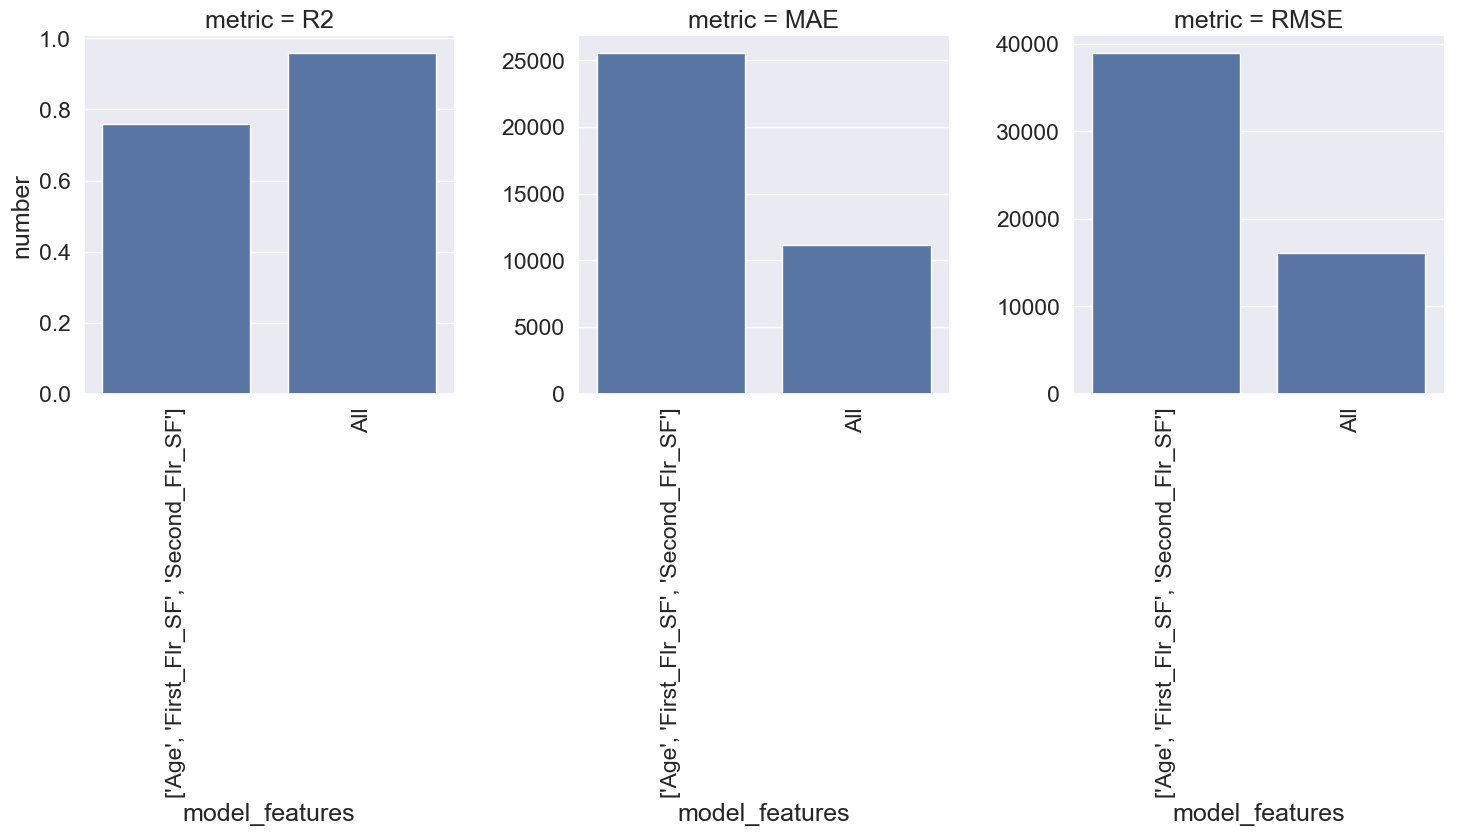

In [45]:
chart = sns.catplot(
    x='model_features',
    y='number',
    col='metric',
    # Rearrange the results in compare_train to plot them
    data=rearrange_df(compare_train),
    kind='bar',
    sharey=False,
)
chart.set_xticklabels(rotation=90);

#### Predict on the test set

Remember that the most important goal for our model is predicting on **new data** that wasn't used to train the model: here, the test set.

We'll predict on the test set - how does the accuracy compare to the training set? Why might there be differences?

In [46]:
compare_test = assess_fit_vars(
    models=models,
    variables=variables,
    # Provide the test data here
    datasetX=ames_test_x,
    datasetY=ames_test_y
)
compare_test.sort_values('RMSE')

RMSE     R2        MAE
All                                 20190.004  0.930  13272.793
[Age, First_Flr_SF, Second_Flr_SF]  34566.085  0.796  23929.025

We can also combine the training and test scores and plot them to compare them easily:

In [47]:
def combine_results(train_scores, test_scores):
    df = rearrange_df(train_scores)
    df['dataset'] = 'train'
    df1 = rearrange_df(test_scores)
    df1['dataset'] = 'test'
    return pd.concat([df, df1], ignore_index=True)

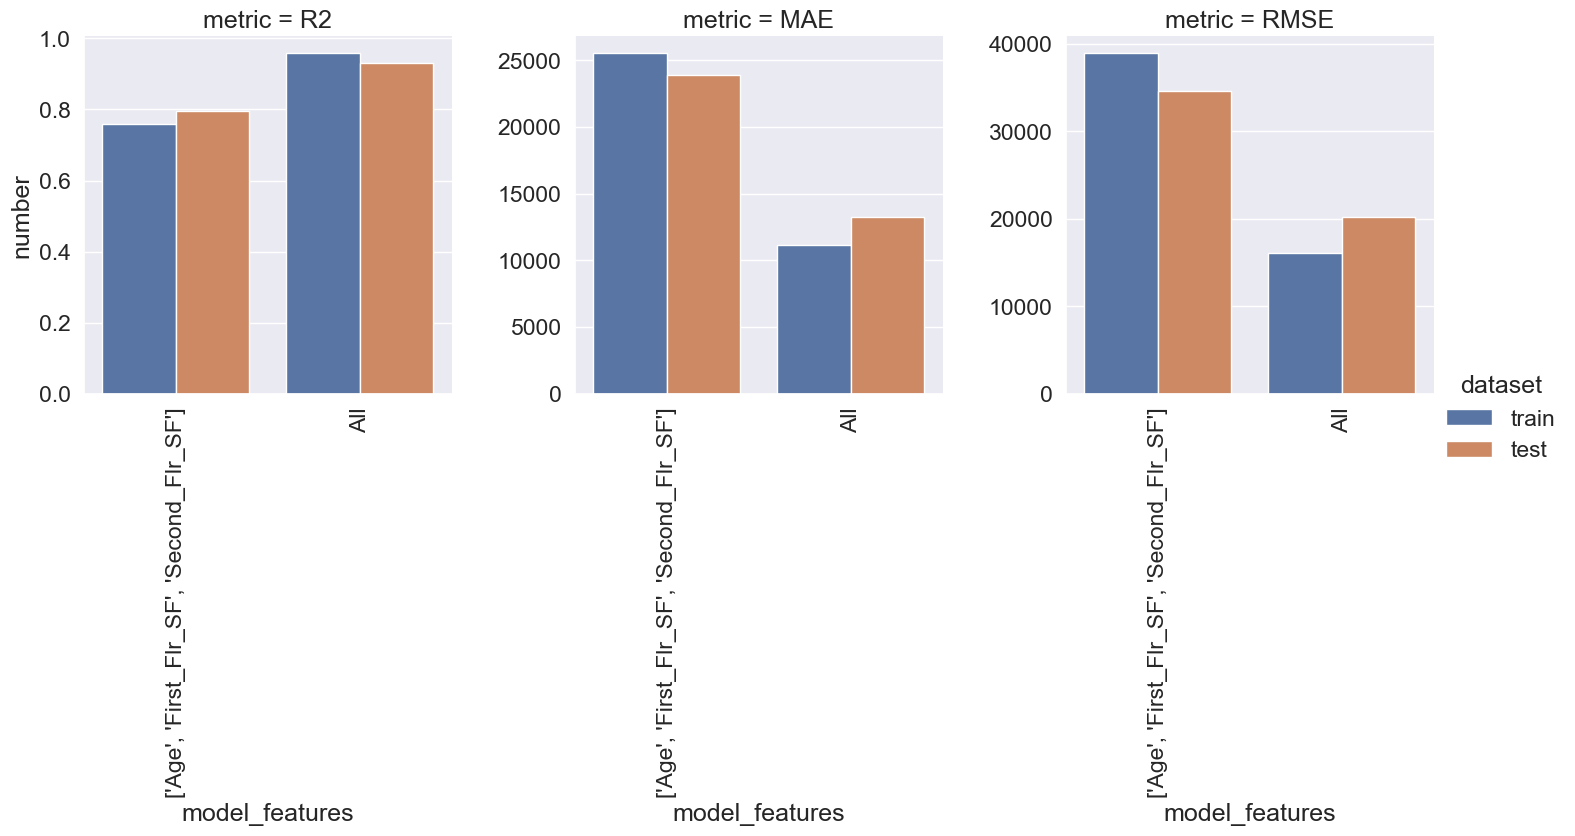

In [48]:
chart = sns.catplot(
    x='model_features',
    y='number',
    col='metric',
    data=combine_results(compare_train, compare_test),
    kind='bar',
    sharey=False,
    # Colour by dataset to compare test/training
    hue="dataset"
)
chart.set_xticklabels(rotation=90);

> ## 📝 Key points: Linear regression
> - Regression is the prediction of the value of a continuous 
> variable based on one or more other continuous or categorical variables.
> - Multiple types of regression can be implemented to fit the data

### Optional extra: interactions

One of the drawbacks of linear regression models is that, without transforming the original predictors, they can only model linear relationships between variables. However, we can create **interaction terms** that combine multiple variables, and potentially capture more complex relationships between those variables.

We'll use `sklearn` to create an interaction between the ground floor living area and second floor square footage. This is a little bit harder to integrate with 
our previous models (as we have to create a dataset with a new interaction term in it),
so it has been kept separate:

In [49]:
# Create interaction term (not polynomial features) 
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True) 
X_inter = interaction.fit_transform(ames_train_x[['Gr_Liv_Area','Second_Flr_SF']])
X_inter = pd.DataFrame(
    X_inter, 
    columns = interaction.get_feature_names_out(['Gr_Liv_Area','Second_Flr_SF'])
)
ames_ols_GrLivArea_Second_Flr_SF_interaction = LinearRegression() 
ames_ols_GrLivArea_Second_Flr_SF_interaction.fit(X_inter, ames_train_y)

LinearRegression()

This is just an example of how to create interactions, so we don't necessarily expect great accuracy, but we could potentially create interactions between all pairs of variables:

In [50]:
# Training performance
assess_fit_vars(
    models=[ames_ols_GrLivArea_Second_Flr_SF_interaction], 
    variables=["All"], 
    datasetX=X_inter, datasetY=ames_train_y
)

RMSE     R2        MAE
All  55222.314  0.516  36406.468

# Regularized regression: Lasso, Ridge, ElasticNet

In [51]:
# Load the libraries we need for this section
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# Disable some distratcting warnings: don't do this in an
#   actual analysis unless you're sure you understand
#   the warnings you see!
import warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Hyperparameter tuning: selecting the optimal value of lambda

Recall that both ridge and lasso regression have an additional parameter, lambda, which captures the penalty for including more (non-zero) features in the model. 


To fit these models, we need to first find the optimal value of lambda (using cross-validation), and then fit the model, and assess its fit.

Also, for both ridge and lasso regression, the **scale** of the variables matters (because the penalty term in the objective function treats all coefficients as comparable!). So we have to use the `StandardScaler()` function to standardize all numeric variables.

We will do all of this in a scikit-learn **pipeline**. Pipelines can include multiple steps, potentially including all your preprocessing and feature engineering. However, as discussed above, for this dataset we found that it was easiest to do *some* of the preprocessing "manually" with custom code. 

Some advantages of pipelines are:

* They make it easy to ensure you're not accidentally **leaking information** from the test dataset when training your model. In short:
  * Use `pipeline.fit_transform(training_data)` on your **training data**: the **transform** part means that the parameters used by the pipeline (e.g. the means and standard deviations of variables, for `StandardScaler`), will be updated from the data.
  * Use `pipeline.fit(test_data)` on you **test data**: the steps of the pipeline are only fitted to your data, using the existing parameter values
* You can keep fewer intermediate datasets around, e.g. you don't have to create separate, scaled copies of the data if you do the scaling within the pipeline

## Ridge regression (L2 regularisation)

The main hyperparameter that needs to be tuned in ridge regression is the size of the penalty applied to the coefficients, which is refeerred to as `alpha` in `sklearn`.

We will generate a range of possible `alpha` values and find the best one using cross-validation.

We'll use `GridSearchCV` here, which is generic and works for all models. However,
for ridge regression there is a specialized algorithm that can be used to do cross-validation
faster (`RidgeCV`), which you should use in actual workflows.

In [52]:
# Test a wide range of alpha values - best to search in log-space
#   since we want to test across a wide range
alphas = list(np.logspace(start=-12, stop=10, num=20, base=2))
params = {
    "alpha": alphas,
}

# Set up our training pipeline
ames_ridge = Pipeline([
    ('scaler', StandardScaler()),
    # Provide the parameters to the cross-validation step
    ('estimator', GridSearchCV(
        ElasticNet(l1_ratio=0), 
        param_grid=params,
        # Set the number of cross-validation folds (we'll use 5 for this workshop)
        cv=5,
        scoring="neg_mean_squared_error",
        n_jobs=-1
    )),
])

ames_ridge.fit(ames_train_x, ames_train_y)

/Users/mmat6620/.miniconda3/envs/mlpy/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+00, tolerance: 5.232e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/mmat6620/.miniconda3/envs/mlpy/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.260e+00, tolerance: 5.241e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 GridSearchCV(cv=5, estimator=ElasticNet(l1_ratio=0), n_jobs=-1,
                              param_grid={'alpha': [0.000244140625,
                                                    0.0005447548426570041,
                                                    0.0012155201068984605,
                                                    0.002712209262919249,
                                                    0.006051795477604125,
                                                    0.013503467082525089,
                                                    0.03013049993570298,
                                                    0.06723066163876137,
                                                    0.15001283994726292,
                                                    0.33472602530611834,
                                                    0.7468794808272431,
                                                    1.6665240127970886,
                                                    3.7185414200336266,
                                                    8.297240355569544,
                                                    18.513763796523502,
                                                    41.31005433431695,
                                                    92.17577840248063,
                                                    205.67327400112214,
                                                    458.922033222583, 1024.0]},
                              scoring='neg_mean_squared_error'))])

After running cross-validation, we can access the final selected parameter value:

In [53]:
# We need to select the 'estimator' step to access the cross-validation outputs:
print("Final alpha value:", ames_ridge["estimator"].best_params_["alpha"])

Final alpha value: 0.06723066163876137


### Viewing cross-validation performance

In addition to the final selected model and parameters, we can also access the performance metrics for each value of the parameter that was tried, and visualize how performance changed across the values:

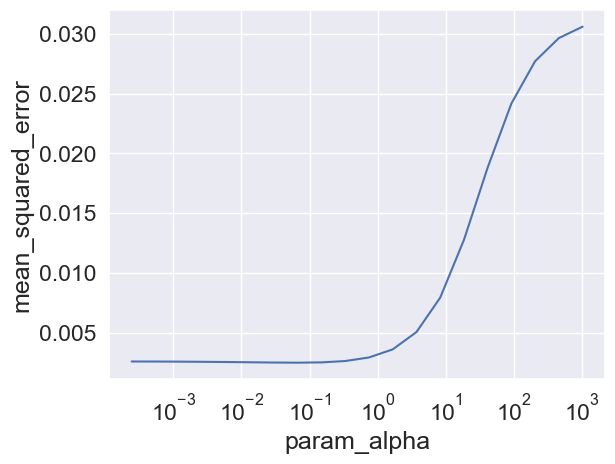

In [54]:
ridge_cv = pd.DataFrame(ames_ridge["estimator"].cv_results_)
ridge_cv["mean_squared_error"] = ridge_cv["mean_test_score"] * -1

ax = sns.lineplot(
    data=ridge_cv,
    # We want to plot across the values of alpha ("param_alpha" in the cv_results)
    x="param_alpha",
    y="mean_squared_error",
)
ax.set_xscale("log")

## Lasso (L1 regularisation)

The lasso model accepts the same parameters and is set up in the same way as the ridge model:

In [55]:
params = {
    "alpha": alphas,
}

ames_lasso = Pipeline([
    ('scaler', StandardScaler()),
    # Provide the parameters to the cross-validation step
    ('estimator', GridSearchCV(
        # We want to do 100% L1 regularisation here, so set l1_ratio to:
        ElasticNet(l1_ratio=1), 
        param_grid=params, 
        cv=5,
        scoring="neg_mean_squared_error",
        n_jobs=-1
    )),
])


ames_lasso.fit(ames_train_x, ames_train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 GridSearchCV(cv=5, estimator=ElasticNet(l1_ratio=1), n_jobs=-1,
                              param_grid={'alpha': [0.000244140625,
                                                    0.0005447548426570041,
                                                    0.0012155201068984605,
                                                    0.002712209262919249,
                                                    0.006051795477604125,
                                                    0.013503467082525089,
                                                    0.03013049993570298,
                                                    0.06723066163876137,
                                                    0.15001283994726292,
                                                    0.33472602530611834,
                                                    0.7468794808272431,
                                                    1.6665240127970886,
                                                    3.7185414200336266,
                                                    8.297240355569544,
                                                    18.513763796523502,
                                                    41.31005433431695,
                                                    92.17577840248063,
                                                    205.67327400112214,
                                                    458.922033222583, 1024.0]},
                              scoring='neg_mean_squared_error'))])

In [56]:
# what is the best value of alpha (the penalty parameter for Lasso regression?)
best_alpha_lasso = ames_lasso["estimator"].best_params_["alpha"]
print(best_alpha_lasso)

0.0005447548426570041


## Elastic Net (combining L1 and L2 regularisation)

In [57]:
params = {
    "alpha": alphas,
    "l1_ratio": np.linspace(0.0, 1.0, num=10),
}

ames_enet = Pipeline([
    ('scaler', StandardScaler()),
    # Provide the parameters to the cross-validation step
    ('estimator', GridSearchCV(
        ElasticNet(), 
        param_grid=params, 
        cv=5,
        scoring="neg_mean_squared_error",
        n_jobs=-1
    )),
])

ames_enet.fit(ames_train_x, ames_train_y)

/Users/mmat6620/.miniconda3/envs/mlpy/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+00, tolerance: 5.063e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/mmat6620/.miniconda3/envs/mlpy/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.241e+00, tolerance: 5.232e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
                              param_grid={'alpha': [0.000244140625,
                                                    0.0005447548426570041,
                                                    0.0012155201068984605,
                                                    0.002712209262919249,
                                                    0.006051795477604125,
                                                    0.013503467082525089,
                                                    0.03013049993570298,
                                                    0.06723066163876137,
                                                    0.15001283994726292,
                                                    0.33472602530611834,
                                                    0.7468794808272431,
                                                    1.6665240127970886,
                                                    3.7185414200336266,
                                                    8.297240355569544,
                                                    18.513763796523502,
                                                    41.31005433431695,
                                                    92.17577840248063,
                                                    205.67327400112214,
                                                    458.922033222583, 1024.0],
                                          'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
                              scoring='neg_mean_squared_error'))])

In [58]:
# get the best parameter values 
best_params_enet = ames_enet["estimator"].best_estimator_
print(best_params_enet.alpha, best_params_enet.l1_ratio)

0.0012155201068984605 0.5555555555555556


We can try to visualise performance across the different parameters again - this time we need to visualise two parameters simultaneously, so we need to use another dimension like colour:

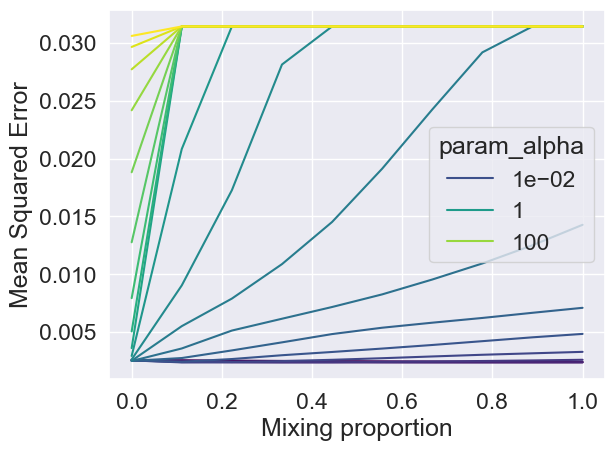

In [59]:
# Visualise the tuning performance
enet_results = pd.DataFrame.from_dict(ames_enet["estimator"].cv_results_)
enet_results["mean_squared_error"] = enet_results["mean_test_score"] * -1
from matplotlib.colors import LogNorm
ax = sns.lineplot(data=enet_results, 
                  x='param_l1_ratio', 
                  y='mean_squared_error',
                  hue='param_alpha',
                  palette=plt.cm.viridis,
                  hue_norm=LogNorm())
ax.set_xlabel("Mixing proportion")
ax.set_ylabel('Mean Squared Error');

> ## ⚠️ Challenge: Elastic Net
>
> 1. Look at the parameters for the model above. What was the balance between L1 (Lasso) and L2 (Ridge) regression?
> 2. What value of alpha was found to be optimal? Was this value expected based on the results we got when we ran Lasso and Ridge independently?

See [this post on Stack Overflow](https://stackoverflow.com/questions/47365978/scikit-learn-elastic-net-approaching-ridge) for more context on this.

## Comparing the models so far

In [60]:
## A similar function has already been defined, but this
## is generic to all models
def assess_model_fit(models,
                     model_labels, 
                     datasetX, 
                     datasetY):
    columns = ['RMSE', 'R2', 'MAE']
    rows = model_labels
    results = pd.DataFrame(0.0, columns=columns, index=rows)
    for i, method in enumerate(models):
        tmp_dataset_X = datasetX
        # while we build the model and predict on the log10Transformed 
        # sale price, we display the error in dollars as that makes more sense
        y_pred = log_transformer.inverse_transform(method.predict(tmp_dataset_X).reshape(-1, 1))
        y_actual = log_transformer.inverse_transform(datasetY)
        results.iloc[i,0] = np.sqrt(mean_squared_error(y_actual, y_pred))
        results.iloc[i,1] = r2_score(y_actual, y_pred)
        results.iloc[i,2] = mean_absolute_error(y_actual, y_pred)
    return(results.round(3))

In [61]:
# What was the RMSE on the training data?
assess_model_fit(models = [ames_ols_all, ames_ridge, ames_lasso, ames_enet],
                 model_labels =['OLS','Ridge', 'Lasso', "ENet"], 
                 datasetX=ames_train_x,
                 datasetY=ames_train_y).sort_values("RMSE")

RMSE     R2        MAE
OLS    16147.691  0.959  11172.815
Ridge  16468.353  0.957  11431.864
Lasso  16662.283  0.956  11510.053
ENet   16840.946  0.955  11628.765

We can also inspect the coefficients of the models to see which variables are important to prediction:

In [62]:
def plot_coefficients(model, labels):
    # Support both regression/regularised regression and 
    #   random forest models
    if hasattr(model, 'coef_'):
        coefs = model.coef_.ravel()
        title = 'Estimated coefficients'
    elif hasattr(model, 'feature_importances_'):
        coefs = model.feature_importances_
        title = 'Feature importances'
    table = pd.Series(coefs, index = labels)
    # Get the largest 20 values (by absolute value)
    table = table[table.abs().nlargest(20).index]

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    ax.set_title(f'{title} (twenty largest in absolute value)', fontsize=14)
    sns.despine()
    return fig, ax

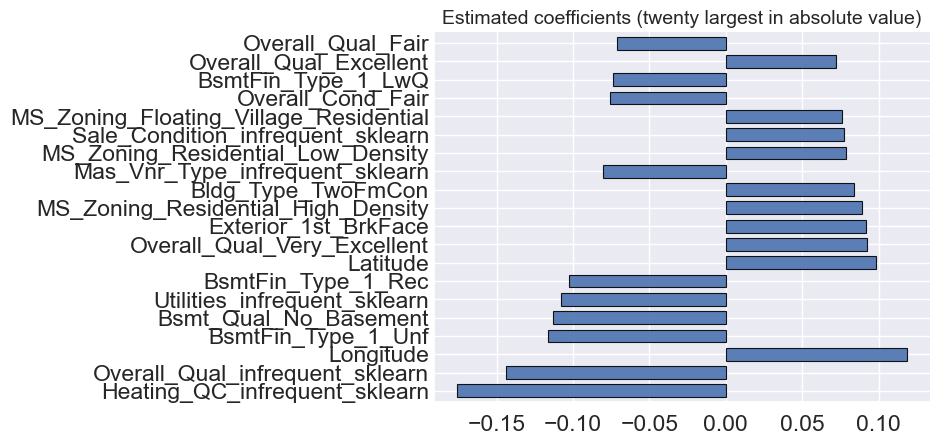

In [63]:
plot_coefficients(ames_ols_all, predictors)
plt.show()

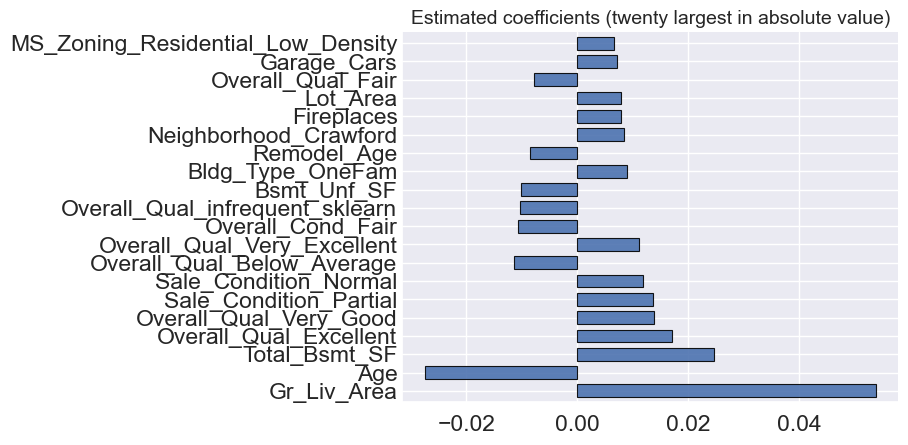

In [64]:
plot_coefficients(ames_enet["estimator"].best_estimator_, predictors)
plt.show()

> ## ⚠️ Challenge: Coefficients
> Compare the top coefficients for the models above. Why do you 
> think the top/bottom predictors are different for each one?

> ### 📝 Key points: Regularized regression and dimension reduction
> - There are many extensions to the basic regression approach 
    which can enable a better fit on the data.
> - Regularisation helps us improve the performance of regression by reducing the impact of less-useful variables

# Random forest regression. K nearest neighbor regression

> ## ❓Questions
> - How do we implement tree-based and distance-based methods in Python?
>
> ## ☑︎ Objectives
> - Fit a RF and KNN model to our data
> - Explore the effect of hyperparameters on model fit

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

## Random forest

In random forest, each tree in the ensemble is built from a bootstrap sample from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is the best split among a random subset of the features. The hyperparameters
control how this is done.

See the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for more details on the parameters.

An example parameter grid for a random forest model looks like:

In [66]:
# tuning grid was defined to optimise the following RF parameters:
param_grid = {"n_estimators": list(np.arange(10, 160, 10)),
             'max_depth': list(np.arange(3, 11, 1)),
             'min_samples_split': [0.005, 0.01, 0.02],
             'max_features': ['sqrt', 1.0]}

This was optimised in advance, and the best outcome of this ended up being:

```
{'max_depth': 9, 'min_samples_split': 0.005, 
'max_features': 1.0, 'n_estimators': 150}

# best score
0.8735794018428228
```

Tuning a grid of multiple parameters (and multiple values for each parameter) can take a long time:
each new parameter value **multiplies** the number of models that have to
be fitted.

For the sake of time, we won't actually tune the model here, but see below for some tips
on tuning large parameter grids.

In [67]:
ames_rf = Pipeline([
    # Note: random forest models don't require variables to be
    #   scaled, so we can skip that step
    ('estimator', RandomForestRegressor(n_estimators=150, 
                                       max_depth = 9,
                                       min_samples_split = 0.005,
                                       max_features = 1.0))
    # If we want to actually tune these parameters
    # ('estimator', GridSearchCV(RandomForestRegressor(), param_grid, scoring='r2', cv=5, n_jobs=-1))
])

ames_rf.fit(ames_train_x, ames_train_y)

Pipeline(steps=[('estimator',
                 RandomForestRegressor(max_depth=9, min_samples_split=0.005,
                                       n_estimators=150))])

> ## ↔️ Extension: Tuning large parameter grids
>
> If you do want to do a grid search over multiple parameters, here are some tips/strategies:
>
> - Use **parallel processing**: `GridSearchCV` has a `n_jobs` argument that allows you to fit
>   multiple models in parallel: `n_jobs=-1` uses all your computer's cores. If you have a
>   modern computer with multiple CPU cores and plenty of RAM (memory), you may be able
>   to tune fairly large grids this way
> - Use the university's [High Performance Computing](https://www.sydney.edu.au/research/facilities/sydney-informatics-hub/digital-research-infrastructure.html)
>   facilities, e.g. Artemis, for jobs that you can't tackle with your local computer.
> - Some models (e.g. `xgboost`) may be able to make use of GPUs for much faster parallel
>   processing - but this can be hard to set up. Aim to train on a GPU only if you're
>   sure you can't use a CPU for your model.
>
> We'll try to show an example of tuning a large parameter grid below in the **xgboost** section

### Random forest: coefficients/feature importances

Random forest models have a specialized method for calculating the importance of each feature for prediction, based on "impurity" - roughly how well the feature separates the data into distinct groups when it is used in a split. We can show that below using our existing
`plot_coefficients` function:

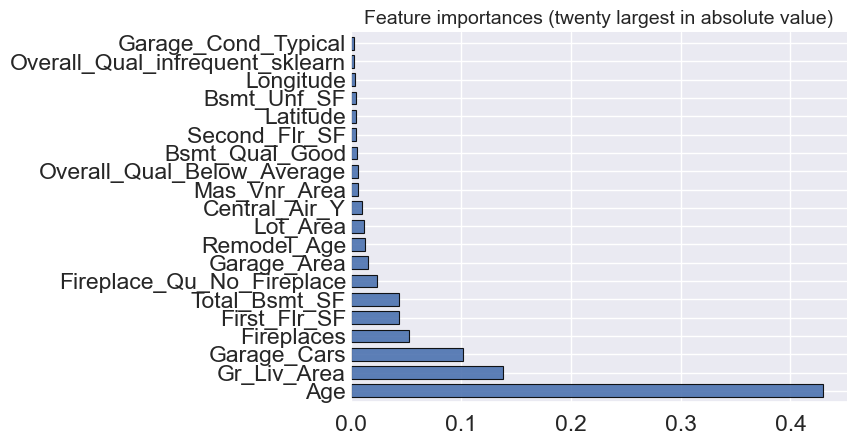

In [68]:
plot_coefficients(ames_rf['estimator'], predictors)
plt.show()

> ℹ️ The plot above shows the impurity-based feature importances, which are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

One disadvantage of impurity-based feature importances is that this can be biased towards features with many unique values (high cardinality). To overcome this bias one can perform a permutation feature importance as shown below (this might take a bit longer to run)

> 🗒️  Note that feature importance based on permutations are model-agnostic and can be applied for other models as well. 

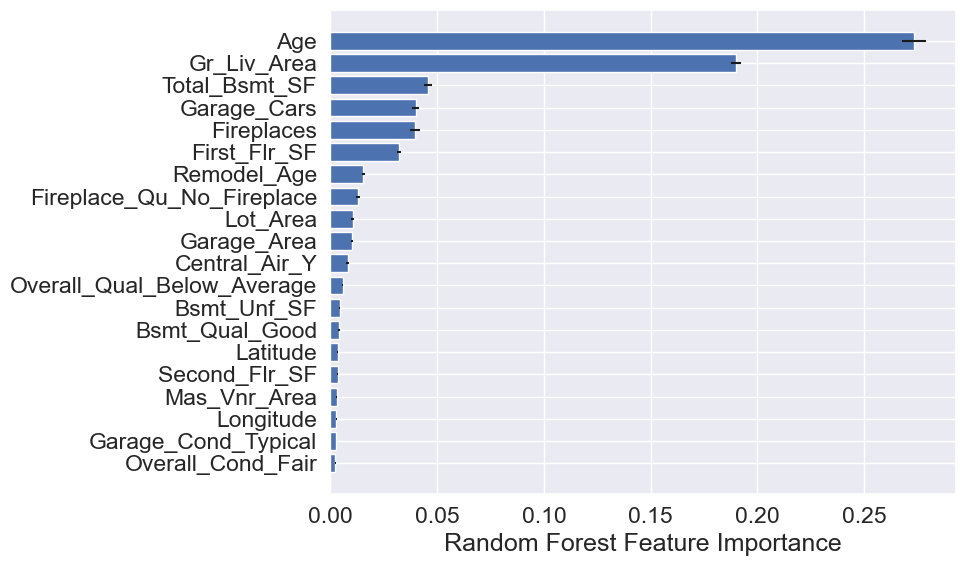

In [69]:
from sklearn.inspection import permutation_importance

perm_res = permutation_importance(ames_rf, ames_train_x, ames_train_y, n_repeats=5, random_state=0, n_jobs=2)
corrcoef_rf = np.asarray(perm_res.importances_mean)
corrcoef_rf_std = np.asarray(perm_res.importances_std)
#Select 20 largest only
sorted_idx = corrcoef_rf.argsort()[-20:]
fig, ax = plt.subplots(figsize = (10,6))
bar = ax.barh(np.arange(20), corrcoef_rf[sorted_idx], xerr = corrcoef_rf_std[sorted_idx],
 tick_label = np.asarray(predictors)[sorted_idx], align='center')
plt.xlabel("Random Forest Feature Importance")
plt.tight_layout()

## k-Nearest Neighbours Regression

Again, for the sake of time, we will not tune the k-nearest neighbours model over a large grid. The parameters below show an example of how you might tune the parameters over a larger grid.

In actual analyses, you want to search over a large grid to ensure you've found the optimal
parameters.

In [70]:
# Grid that searches over a range of n_neighbors
param_grid = {
    "n_neighbors": list(np.arange(3,21,2)),
    "weights": ['uniform','distance'],
}

# Results from tuning:
# print(ames_kNN.named_steps['estimator'].best_score_)
# 0.7842456772785913
# KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=7, p=2, weights='distance')

Here, we'll just tune over a smaller grid (centred around the optimal value for `n_neighbors` we found in advance):

In [71]:
# Next, let's try to tune locally, trying 6, 7 and 8 neighbors:
param_grid = {"n_neighbors": [6,7,8],
              "weights": ['uniform']}


ames_knn = Pipeline([
    # KNN models are strongly affected by scaling, so add the scaler step
    #  again
    ('scaler', StandardScaler()),
    ('estimator', GridSearchCV(KNeighborsRegressor(), 
                               param_grid, scoring='r2', cv=10))
])

ames_knn.fit(ames_train_x, ames_train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
                              param_grid={'n_neighbors': [6, 7, 8],
                                          'weights': ['uniform']},
                              scoring='r2'))])

In [72]:
print(ames_knn['estimator'].best_estimator_)
print(ames_knn['estimator'].best_score_)

KNeighborsRegressor(n_neighbors=8)
0.7852735531162522


In [73]:
compare_train = assess_model_fit(
    models=[ames_ols_all, ames_ridge, ames_lasso, ames_enet, 
            ames_rf, ames_knn],
    model_labels=['OLS','Ridge', 'Lasso', 'ENet', 'RF', 'kNN'],
    datasetX=ames_train_x,
    datasetY=ames_train_y)
compare_train.sort_values('RMSE')

RMSE     R2        MAE
RF     15970.494  0.960  10946.178
OLS    16147.691  0.959  11172.815
Ridge  16468.353  0.957  11431.864
Lasso  16662.283  0.956  11510.053
ENet   16840.946  0.955  11628.765
kNN    31985.402  0.838  20045.541

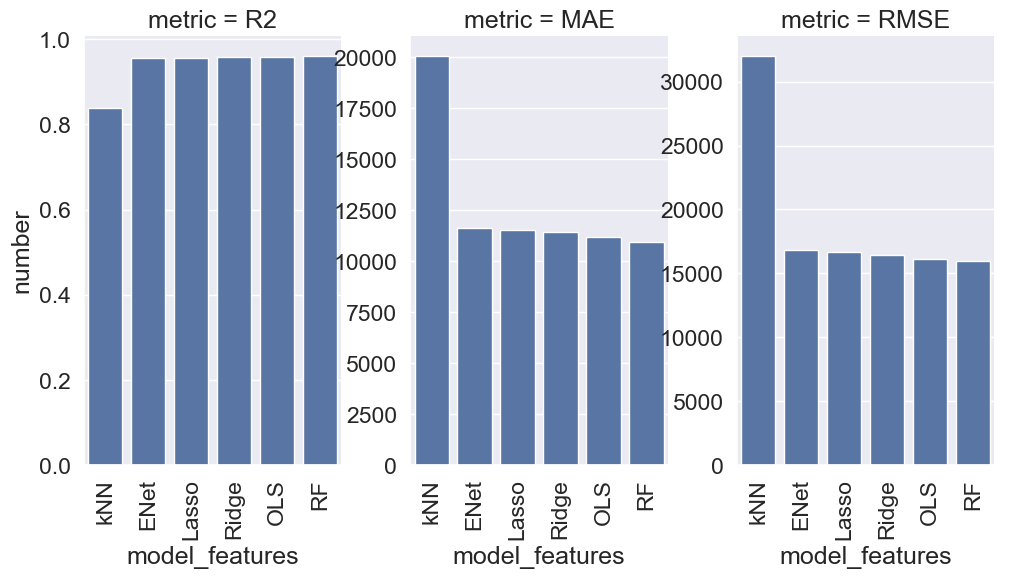

In [74]:
chart = sns.catplot(
    x='model_features',
    y='number',
    col='metric',
    data=rearrange_df(compare_train),
    kind='bar',
    sharey=False,
)
chart.fig.set_size_inches((10, 6))
chart.set_xticklabels(rotation=90);

In [75]:
compare_test = assess_model_fit(
    models=[ames_ols_all, ames_ridge, ames_lasso, ames_enet, 
            ames_rf, ames_knn],
    model_labels=['OLS','Ridge', 'Lasso', 'ENet', 'RF', 'kNN'],
    datasetX=ames_test_x,
    datasetY=ames_test_y)
compare_test.sort_values('RMSE')

RMSE     R2        MAE
Ridge  19780.481  0.933  13041.058
Lasso  20074.502  0.931  13166.474
ENet   20115.991  0.931  13245.547
OLS    20190.004  0.930  13272.793
RF     27383.923  0.872  16859.599
kNN    34742.977  0.794  23373.438

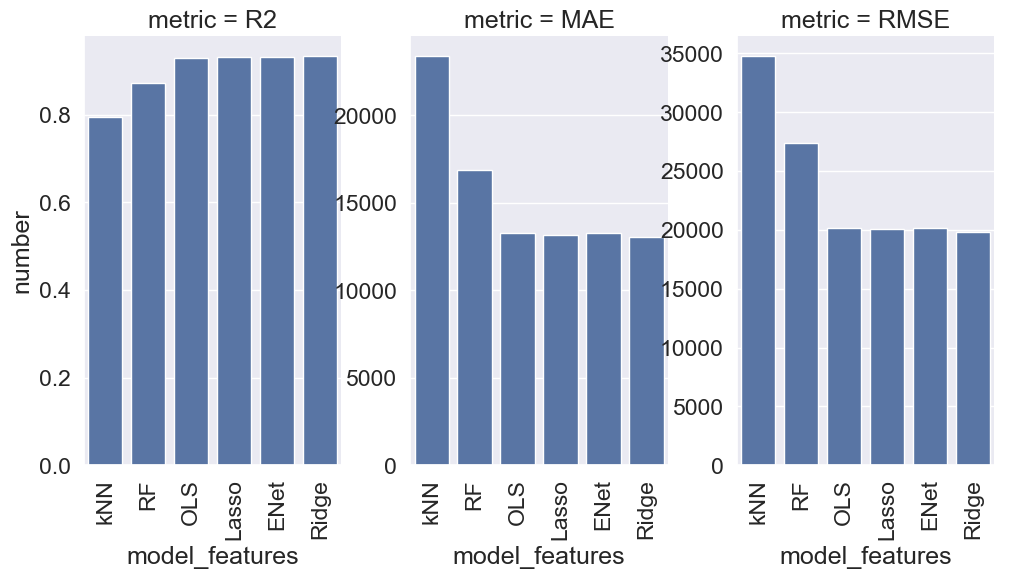

In [76]:
chart = sns.catplot(
    x='model_features',
    y='number',
    col='metric',
    data=rearrange_df(compare_test),
    kind='bar',
    sharey=False,
)
chart.fig.set_size_inches((10, 6))
chart.set_xticklabels(rotation=90);

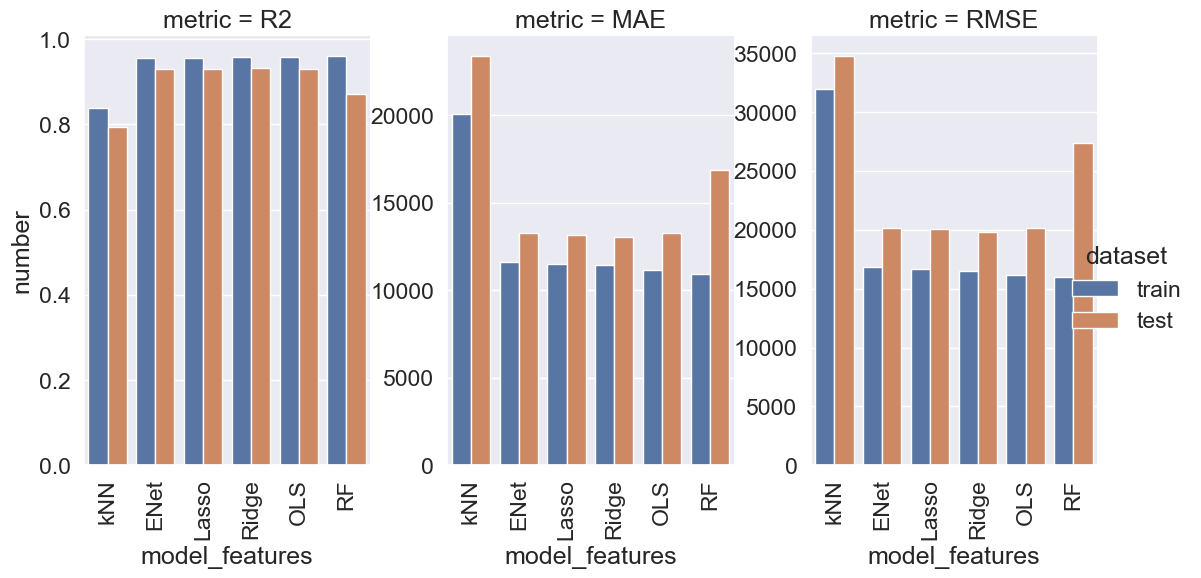

In [77]:
chart = sns.catplot(
    x='model_features',
    y='number',
    col='metric',
    data=combine_results(compare_train, compare_test),
    kind='bar',
    sharey=False,
    hue='dataset'
)
chart.fig.set_size_inches((12, 6))
chart.set_xticklabels(rotation=90);

> ## 📝 Key points: Random forests and distance-based methods
> - Random forests can be combined to solve regression tasks
> - kNN is a method that can also be used for regression

# Gradient boosting methods: XGBoost

> ## ❓Questions
> - What are some newer approaches to ML?
> - What are their pros and cons?
>
> ## ☑︎ Objectives
> - Explore how to optimise ML models with
>   a much larger number of parameters
> - Learn strategies for dealing with large models and
>   large parameter spaces

In [78]:
import xgboost as xgb
import optuna
from sklearn.metrics import root_mean_squared_error

/Users/mmat6620/.miniconda3/envs/mlpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Gradient boosting and XGBoost

Models like `XGBoost` can achieve high accuracy
on a wide range of datasets, but they are complex
models with a large number of hyperparameters
governing their behaviour.

With a large number of hyperparameters:

- It can be difficult to "manually tune" models by inspecting
  how performance changes across different values of the parameter
- The search space gets very large: if you have $n_1$ values for one parameter, then $n_2$ and $n_3$ values for other parameters, a grid
  search has to test $n_1 \times n_2 \times n_3$ parameter combinations

To tune models with many hyperparameters, you can:

* Use the university HPC (Artemis) to run a grid search. Since this works best when you can split a task into smaller individual jobs, you can construct
  a grid of parameters, and for each individual parameter combination
  (and possibly each cross validation fold!),
  pass them to a script that fits the training data to that combination
  and returns the score
* Use a parameter tuning algorithm that can explore the search space automatically, and suggest/generate parameters that are closer
  to the optimal parameters. Examples include [hyperopt](http://hyperopt.github.io/hyperopt/) and [optuna](https://optuna.org/)

To demonstrate this, we will use the [optuna](https://optuna.org/) package to optimize the parameters.

## Automatic parameter tuning with optuna

Tuning a model with `optuna` requires you to define the search
space a bit differently to the grid search: instead of providing
specific values, you have to define the random distributions
to sample from during tuning.

`optuna` requires you to define a function to fit the model
for each parameter combination, and return the error metric. This is a bit more manual work than previous models, where `sklearn` has
tools to automatically choose parameters based on an error metric.

The difficult part of tuning the parameters is determining a range that's reasonable for each parameter - this requires some understanding of the model and how each parameter is used.

> ### ⚠️ Challenge: XGBoost parameters
> Review the documentation about XGBoost's [parameters](https://xgboost.readthedocs.io/en/stable/parameter.html#parameters-for-tree-booster).
> Do the values defined here for the parameter search look sensible?
> If you don't have enough knowledge to judge this yourself, where
> could you look for guidance?

In [79]:
def optimize(trial: optuna.Trial):
    params = {
        'max_depth': trial.suggest_int("max_depth", 1, 5),
        'gamma': trial.suggest_float("gamma", 0, 1),
        'reg_alpha' : trial.suggest_float("reg_alpha", 0, 50),
        'reg_lambda' : trial.suggest_float("reg_lambda", 10, 100),
        'colsample_bytree' : trial.suggest_float("colsample_bytree", 0, 1),
        'min_child_weight' : trial.suggest_float("min_child_weight", 0, 5),
        'n_estimators': trial.suggest_int("n_estimators", 50, 1000, log=True),
        'learning_rate': trial.suggest_float("learning_rate", 0, .15),
        'max_bin' : trial.suggest_int("max_bin", 50, 500)
    }
    model = xgb.XGBRegressor(**params, objective='reg:squarederror')
    # NOTE: using early stopping like this to prevent overfitting
    #   may require a "validation" dataset, separate from
    #   both the training and test set. We just use the test
    #   set here for illustration
    evaluation = [(ames_test_x, ames_test_y)]
    model.fit(ames_train_x, ames_train_y, 
              eval_set=evaluation, 
              eval_metric="rmse",
              early_stopping_rounds=100,
              verbose=False)

    #Obtain prediction and rmse score.
    pred = model.predict(ames_test_x)
    rmse = root_mean_squared_error(ames_test_y, pred)
    
    return rmse

Once you've defined the search space and the tuning function, you can start running the algorithm to search for the optimal parameters.

For this workshop, we will only run a small number of iterations - definitely not enough to properly explore the parameter space.

More iterations require more computing resources and more time. As a guide, running 5,000 trials took 40 minutes on a recent MacBook

In [80]:
n_trials = 100

# Reduce the amount of output
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction='minimize')
study.optimize(optimize, n_trials=n_trials, show_progress_bar=True, n_jobs=-1)

Best trial: 83. Best value: 0.0709378: 100%|██████████████████████| 100/100 [00:24<00:00,  4.08it/s]


In [81]:
study.best_params

{'max_depth': 2,
 'gamma': 0.1650099696554448,
 'reg_alpha': 0.12096165031365169,
 'reg_lambda': 65.34764176794171,
 'colsample_bytree': 0.3323210424105343,
 'min_child_weight': 4.661512875470192,
 'n_estimators': 195,
 'learning_rate': 0.03856571959943486,
 'max_bin': 444}

The parameters we find with a small number of trials are unlikely to be optimal, so instead we'll use parameters we found by tuning for 5,000 trials:

In [82]:
xgb_tuned_params = {
    'max_depth': 3,
    'gamma': 0.0001898945871315337,
    'reg_alpha': 0.012021942260241877,
    'reg_lambda': 14.972731190737358,
    'colsample_bytree': 0.3436362920251812,
    'min_child_weight': 1.6176495662230623,
    'n_estimators': 999,
    'learning_rate': 0.09497626888034086,
    'max_bin': 62
}

In [83]:
ames_xgb = xgb.XGBRegressor(**xgb_tuned_params, objective='reg:squarederror')
ames_xgb.fit(ames_train_x, ames_train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3436362920251812, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0001898945871315337,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09497626888034086,
             max_bin=62, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.6176495662230623, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=999,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

How does the `xgboost` model perform on the training set?

In [84]:
assess_model_fit(models=[ames_ols_all, ames_ridge, ames_lasso, ames_enet, ames_rf, ames_knn, ames_xgb],
    model_labels=['OLS','Ridge', 'Lasso', 'ENet', 'RF', 'kNN', "XGB"],
    datasetX=ames_train_x,
    datasetY=ames_train_y).sort_values("RMSE")

RMSE     R2        MAE
XGB     9864.616  0.985   6925.437
RF     15970.494  0.960  10946.178
OLS    16147.691  0.959  11172.815
Ridge  16468.353  0.957  11431.864
Lasso  16662.283  0.956  11510.053
ENet   16840.946  0.955  11628.765
kNN    31985.402  0.838  20045.541

And on the test set?

In [85]:
assess_model_fit(models=[ames_ols_all, ames_ridge, ames_lasso, ames_enet, ames_rf, ames_knn, ames_xgb],
                 model_labels=['OLS','Ridge', 'Lasso', 'ENet', 'RF', 'kNN', "XGB"],
                 datasetX=ames_test_x,
                 datasetY=ames_test_y).sort_values("RMSE")

RMSE     R2        MAE
Ridge  19780.481  0.933  13041.058
Lasso  20074.502  0.931  13166.474
ENet   20115.991  0.931  13245.547
OLS    20190.004  0.930  13272.793
XGB    20555.272  0.928  13133.382
RF     27383.923  0.872  16859.599
kNN    34742.977  0.794  23373.438

> ## ℹ️ xgboost has a lot of options!
> Note that the parameter tuning above still doesn't cover all the potential
> options available in the xgboost model - there is also the option to try [different boosting algorithms](https://xgboost.readthedocs.io/en/stable/tutorials/dart.html), sometimes with their own unique parameters.
>
> We may not have maximised the performance of XGBoost in our example.